<a href="https://colab.research.google.com/github/cchiayik/etch-rate-spc-jmp-study/blob/main/Etch_Rate_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MIT License

Copyright (c) 2025 CHEW CHIA YIK

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

#Introduction
Etch rate is a crucial metric in oxide layer formation on silicon wafer. It is defined as the amount of oxide etched from the wafer area per unit time (unit: Angstroms/min). The target Etch Rate for this study is **620** with lower and upper specifications of **545** and **695 Å/min**, respectively (i.e., 620 +/- 75 Å/min).
For this study, 20 wafers were etched for each calibration. 5 wafers will be randomly sampled across 40 runs per etching line, leading to 200 wafers sampled for each line. Moreover, the etch rate will be measured at 4 separate locations on each wafer. This results in 5 x 40 x 4 = 800 Etch Rate values per etching line.

Based upon this sampling strategy, three sources of variation can be examined for each line:

1.   Within wafer
2.   Between wafers within run
3.   Between run within calibration stages
4.   Between calibration stages



In this case study, three etching lines, which are B, C and D, were analysed. Note that this case study is an exercise titled “JMP064: Variation in Semiconductor Etching Process” provided by SAS, the developer of JMP software.

In [101]:
import pandas as pd

# Load the data
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("Etching.csv",parse_dates=False, dtype={'Run-Wafer': str})


# Function to calculate SPC stats
def calculate_spc_stats(series):
    mean = series.mean() #mean
    std = series.std() #standard deviation
    ucl = mean + 3 * std  #upper control limit
    lcl = mean - 3 * std  #lower control limit
    outside_limits = ((series > ucl) | (series < lcl)).sum()  #calculate the total number of outliers
    return pd.Series({
        "Mean": mean,
        "Std Dev": std,
        "UCL": ucl,
        "LCL": lcl,
        "Points Outside Limits": outside_limits
    }) #return the value in series with respective headers

# Apply the SPC function to each etch rate column
spc_summary = df[["Etch Rate_B", "Etch Rate_C", "Etch Rate_D"]].apply(calculate_spc_stats)  #input value of Etch Rate B,C and D into the function


# Transpose for better readability
spc_summary = spc_summary.T

# Display result
print(spc_summary)

Saving Etching.csv to Etching (1).csv
                   Mean    Std Dev         UCL         LCL  \
Etch Rate_B  611.753514  15.347122  657.794880  565.712148   
Etch Rate_C  587.254740  20.031354  647.348801  527.160679   
Etch Rate_D  609.124675  33.658480  710.100114  508.149236   

             Points Outside Limits  
Etch Rate_B                    2.0  
Etch Rate_C                    4.0  
Etch Rate_D                    5.0  


#Histogram

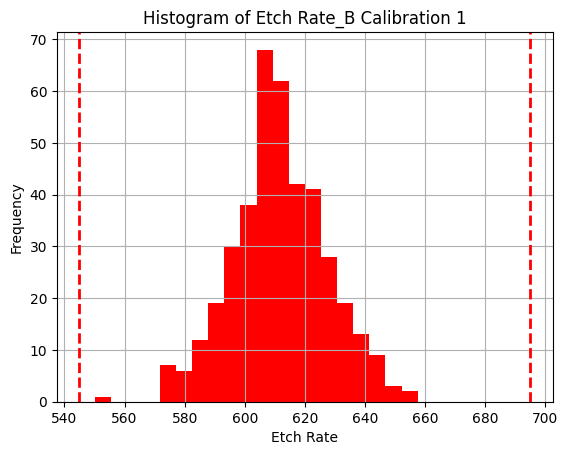

Mean: 611.608316214
STD: 15.676244125605436


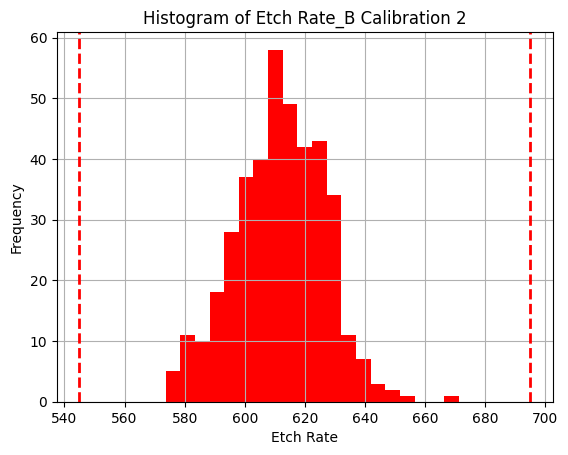

Mean: 611.89871186625
STD: 15.029029014841399


In [102]:
import matplotlib.pyplot as plt

#Histogram for Etch Rate B for Calibration 1
df[df['Calibration']==1]['Etch Rate_B'].hist(bins=20, color='red')
plt.title('Histogram of Etch Rate_B Calibration 1')
plt.xlabel('Etch Rate')
plt.ylabel('Frequency')
#Spec limit
plt.axvline(x=545, color='red', linestyle='--', linewidth=2) #LCL 545 Å/min
plt.axvline(x=695, color='red', linestyle='--', linewidth=2) #UCL 695 Å/min
plt.show()

# print mean and standard deviation
print('Mean:', df[df['Calibration']==1]['Etch Rate_B'].mean())
print('STD:', df[df['Calibration']==1]['Etch Rate_B'].std())


#Histogram for Etch Rate B for Calibration 2
df[df['Calibration']==2]['Etch Rate_B'].hist(bins=20, color='red')
plt.title('Histogram of Etch Rate_B Calibration 2')
plt.xlabel('Etch Rate')
plt.ylabel('Frequency')
#Spec limit
plt.axvline(x=545, color='red', linestyle='--', linewidth=2) #LCL 545 Å/min
plt.axvline(x=695, color='red', linestyle='--', linewidth=2) #UCL 695 Å/min
plt.show()

print('Mean:', df[df['Calibration']==2]['Etch Rate_B'].mean())
print('STD:', df[df['Calibration']==2]['Etch Rate_B'].std())


Red histogram shows that the variation in etch rate during both calibration stages is not excessive, with no evident difference in either the variation or the average.

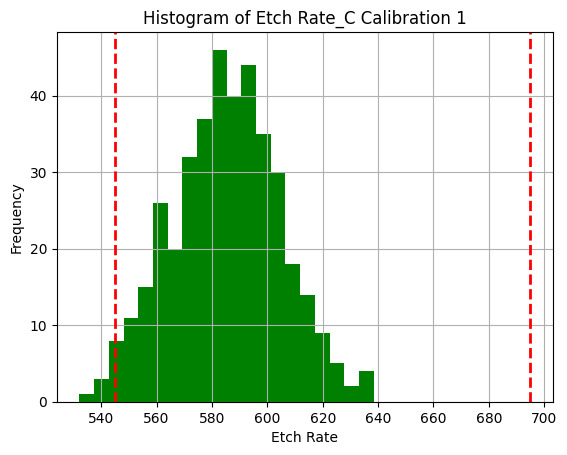

Mean: 585.25080944375
STD 19.621186281888786


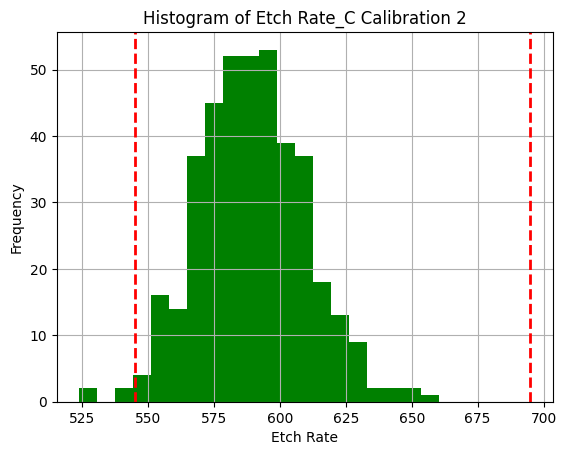

Mean: 589.2586698555001
STD: 20.26014210983008


In [103]:
df[df['Calibration']==1]['Etch Rate_C'].hist(bins=20,color='green')
plt.title('Histogram of Etch Rate_C Calibration 1')
plt.xlabel('Etch Rate')
plt.ylabel('Frequency')
plt.axvline(x=545, color='red', linestyle='--', linewidth=2) #LCL 545 Å/min
plt.axvline(x=695, color='red', linestyle='--', linewidth=2) #UCL 695 Å/min
plt.show()

print('Mean:', df[df['Calibration']==1]['Etch Rate_C'].mean())
print('STD', df[df['Calibration']==1]['Etch Rate_C'].std())

df[df['Calibration']==2]['Etch Rate_C'].hist(bins=20,color='green')
plt.title('Histogram of Etch Rate_C Calibration 2')
plt.xlabel('Etch Rate')
plt.ylabel('Frequency')
plt.axvline(x=545, color='red', linestyle='--', linewidth=2) #LCL 545 Å/min
plt.axvline(x=695, color='red', linestyle='--', linewidth=2) #UCL 695 Å/min
plt.show()

print('Mean:', df[df['Calibration']==2]['Etch Rate_C'].mean())
print('STD:', df[df['Calibration']==2]['Etch Rate_C'].std())


For Etch Rate C, the distribution appears approximately normal with most data points concentrated around 585.25 at Calibration 1 and shifted to 589.26 at Calibration 2, with numerous points exceeding the LSL for both calibrations. This is accompanied by an increase in standard deviation from 19.62 to 20.26.

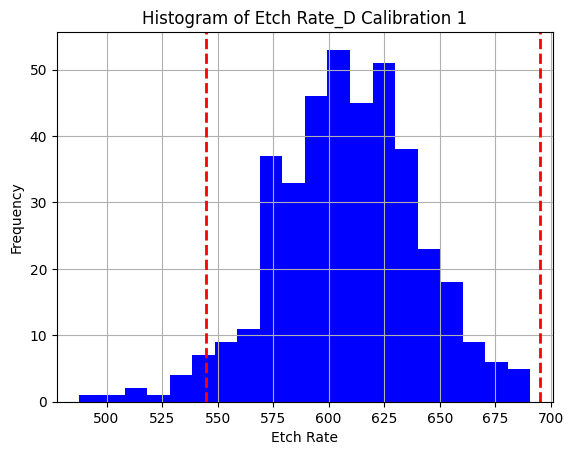

Mean: 608.4408749999999
STD: 32.566496529791756


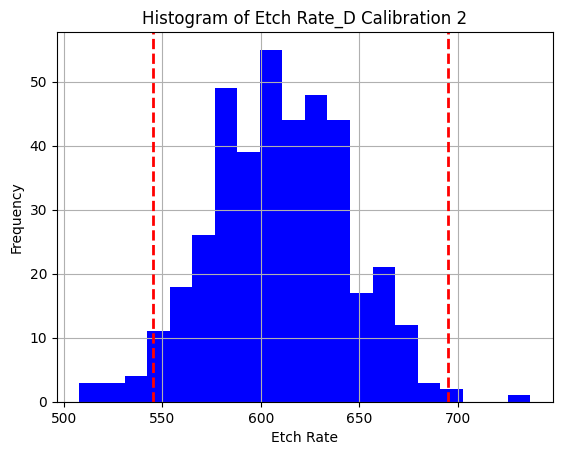

Mean: 609.808475
STD: 34.74351196242375


In [104]:
df[df['Calibration']==1]['Etch Rate_D'].hist(bins=20, color= 'blue')
plt.title('Histogram of Etch Rate_D Calibration 1')
plt.xlabel('Etch Rate')
plt.ylabel('Frequency')
plt.axvline(x=545, color='red', linestyle='--', linewidth=2) #LCL 545 Å/min
plt.axvline(x=695, color='red', linestyle='--', linewidth=2) #UCL 695 Å/min
plt.show()
print('Mean:', df[df['Calibration']==1]['Etch Rate_D'].mean())
print('STD:', df[df['Calibration']==1]['Etch Rate_D'].std())


df[df['Calibration']==2]['Etch Rate_D'].hist(bins=20, color= 'blue')
plt.title('Histogram of Etch Rate_D Calibration 2')
plt.xlabel('Etch Rate')
plt.ylabel('Frequency')
plt.axvline(x=545, color='red', linestyle='--', linewidth=2) #LCL 545 Å/min
plt.axvline(x=695, color='red', linestyle='--', linewidth=2) #UCL 695 Å/min
plt.show()
print('Mean:', df[df['Calibration']==2]['Etch Rate_D'].mean())
print('STD:', df[df['Calibration']==2]['Etch Rate_D'].std())


In contrast, Etch Rate D exhibits a broader spread and larger standard deviation, suggesting higher variability in the process.

## Explaination of Histogram

From Red Histogram, it is evident that the data of Etch Rate B are within the LSL and USL, indicating a stable and well-controlled variation. However, Etch Rate C and D exhibit overall process variation that extends beyond the specification limits as shown in Green Histogram and Blue Histogram, respectively, which indicates undesirable variation as variation should be well within the defined specification ideally

# Two-Tailed Test

In [105]:
import numpy as np
from scipy import stats
import pandas as pd

# Define the columns to analyze
etch_rate_columns = ['Etch Rate_B', 'Etch Rate_C', 'Etch Rate_D']
calibration_groups = [1, 2]
alpha = 0.05

# Create a results dataframe to store all test results
results = []

# Loop through each etch rate column
for etch_col in etch_rate_columns:
    print(f"\n{'='*50}")
    print(f"Analyzing column: {etch_col}")
    print(f"{'='*50}")

    # Extract data for both calibration groups
    sample1 = df.loc[df['Calibration'] == 1, etch_col].dropna().values
    sample2 = df.loc[df['Calibration'] == 2, etch_col].dropna().values


    # Check assumptions
    _, p_shapiro1 = stats.shapiro(sample1)
    _, p_shapiro2 = stats.shapiro(sample2)
    _, p_levene = stats.levene(sample1, sample2)

    print(f"\nNormality (Shapiro-Wilk): Group1={p_shapiro1:.3f}, Group2={p_shapiro2:.3f}")
    print(f"Equal variance (Levene): p={p_levene:.3f}")

    # Store test results
    test_result = {
        'Column': etch_col,
        'Group1_n': len(sample1),
        'Group2_n': len(sample2),
        'Group1_mean': np.mean(sample1),
        'Group2_mean': np.mean(sample2),
        'Shapiro_p1': p_shapiro1,
        'Shapiro_p2': p_shapiro2,
        'Levene_p': p_levene
    }

    # Choose test based on assumptions (Check for Normal Distribution and Homogeinity)
    if p_shapiro1 < 0.05 or p_shapiro2 < 0.05: #if data not normally distributed
        print("Using Mann-Whitney U (non-normal data)")
        u_stat, p_value = stats.mannwhitneyu(sample1, sample2)
        print(f"U-statistic: {u_stat:.2f}, P-value: {p_value:.4f}")
        test_result.update({
            'Test': 'Mann-Whitney U',
            'Statistic': u_stat,
            'p_value': p_value
        })
    else: #if data is normally distirbuted
        equal_var = p_levene > 0.05 # condition for homogeinity or data sets has equal variance
        test_name = "Student's t-test" if equal_var else "Welch's t-test" # Student t test for equal variance data, Welch t test for heterogeneous data
        print(f"Using {test_name}")
        t_stat, p_value = stats.ttest_ind(sample1, sample2, equal_var=equal_var)
        print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")
        test_result.update({
            'Test': test_name,
            'Statistic': t_stat,
            'p_value': p_value
        })

    # Decision
    if p_value <= alpha:
        conclusion = "Significant difference (p ≤ 0.05)"
        print(f"Reject H₀: {conclusion}")
    else:
        conclusion = "No significant difference (p > 0.05)"
        print(f"Fail to reject H₀: {conclusion}")

    test_result['Conclusion'] = conclusion
    results.append(test_result)

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display all results
print("\n\nSummary of all tests:")
print(results_df.to_string(index=False))



Analyzing column: Etch Rate_B

Normality (Shapiro-Wilk): Group1=0.314, Group2=0.200
Equal variance (Levene): p=0.683
Using Student's t-test
T-statistic: -0.27, P-value: 0.7892
Fail to reject H₀: No significant difference (p > 0.05)

Analyzing column: Etch Rate_C

Normality (Shapiro-Wilk): Group1=0.621, Group2=0.599
Equal variance (Levene): p=0.699
Using Student's t-test
T-statistic: -2.84, P-value: 0.0046
Reject H₀: Significant difference (p ≤ 0.05)

Analyzing column: Etch Rate_D

Normality (Shapiro-Wilk): Group1=0.068, Group2=0.858
Equal variance (Levene): p=0.131
Using Student's t-test
T-statistic: -0.57, P-value: 0.5659
Fail to reject H₀: No significant difference (p > 0.05)


Summary of all tests:
     Column  Group1_n  Group2_n  Group1_mean  Group2_mean  Shapiro_p1  Shapiro_p2  Levene_p             Test  Statistic  p_value                           Conclusion
Etch Rate_B       400       400   611.608316   611.898712    0.313853    0.200341  0.683291 Student's t-test  -0.267440 0.

A two-sample t-test comparing the process means between these two stages yielded a probability of 0.7915 (> 0.05) which indicates no significant difference between both means.

The two-sample t-test confirmed a significant difference between means of both calibrations for Etch Rate C with a probability of 0.0048 (< 0.05).

The two-sample t-test confirmed a non-significant difference between the means of both calibration 1 and 2 for Etch Rate D with a probability of 0.5648 (> 0.05).


#Control Chart

Control charts are crucial for determine multiple variation source in a process. The X-bar chart plots the mean of etch rate value within every run while the S-chart displays the standard deviation. The control limits line in the X-bar chart is obtained from the variation estimation in S Chart, thus as a rule of thumb it is recommended to check the S chart first, then the X-bar Chart. For the S Chart, the middle lines represent average standard deviation across 20 runs within each calibration stage. The other lines denote the lower and upper control limits (LCL and UCL) which are based upon the variation in the standard deviation values, set at +/- 3 standard deviation of the statistic being plotted. The X-bar chart uses the average of 20 runs means as the centre line with control limit set as +/- 3 standard deviation of the sample mean which derived from the S chart. Thus, if the S chart exhibit inconsistent variation, the standard deviation and control limit might be overestimated leading inaccurate control limit in X-bar chart as well. This is why the S chart is evaluated first.

##S Chart (Between Runs)

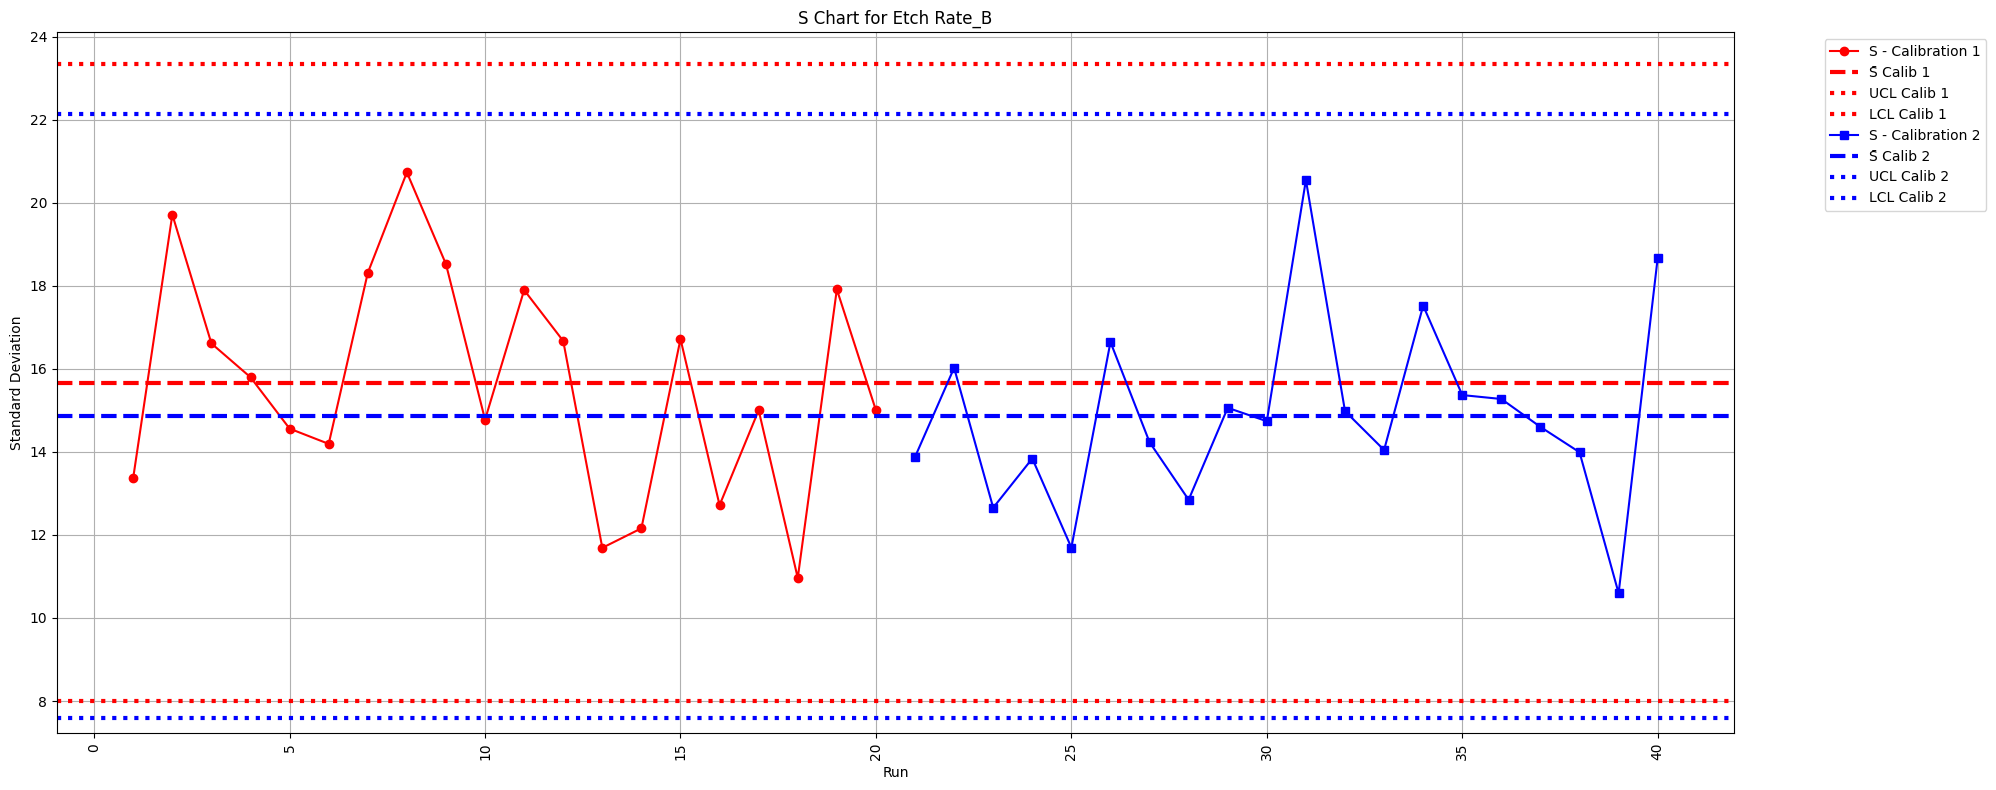

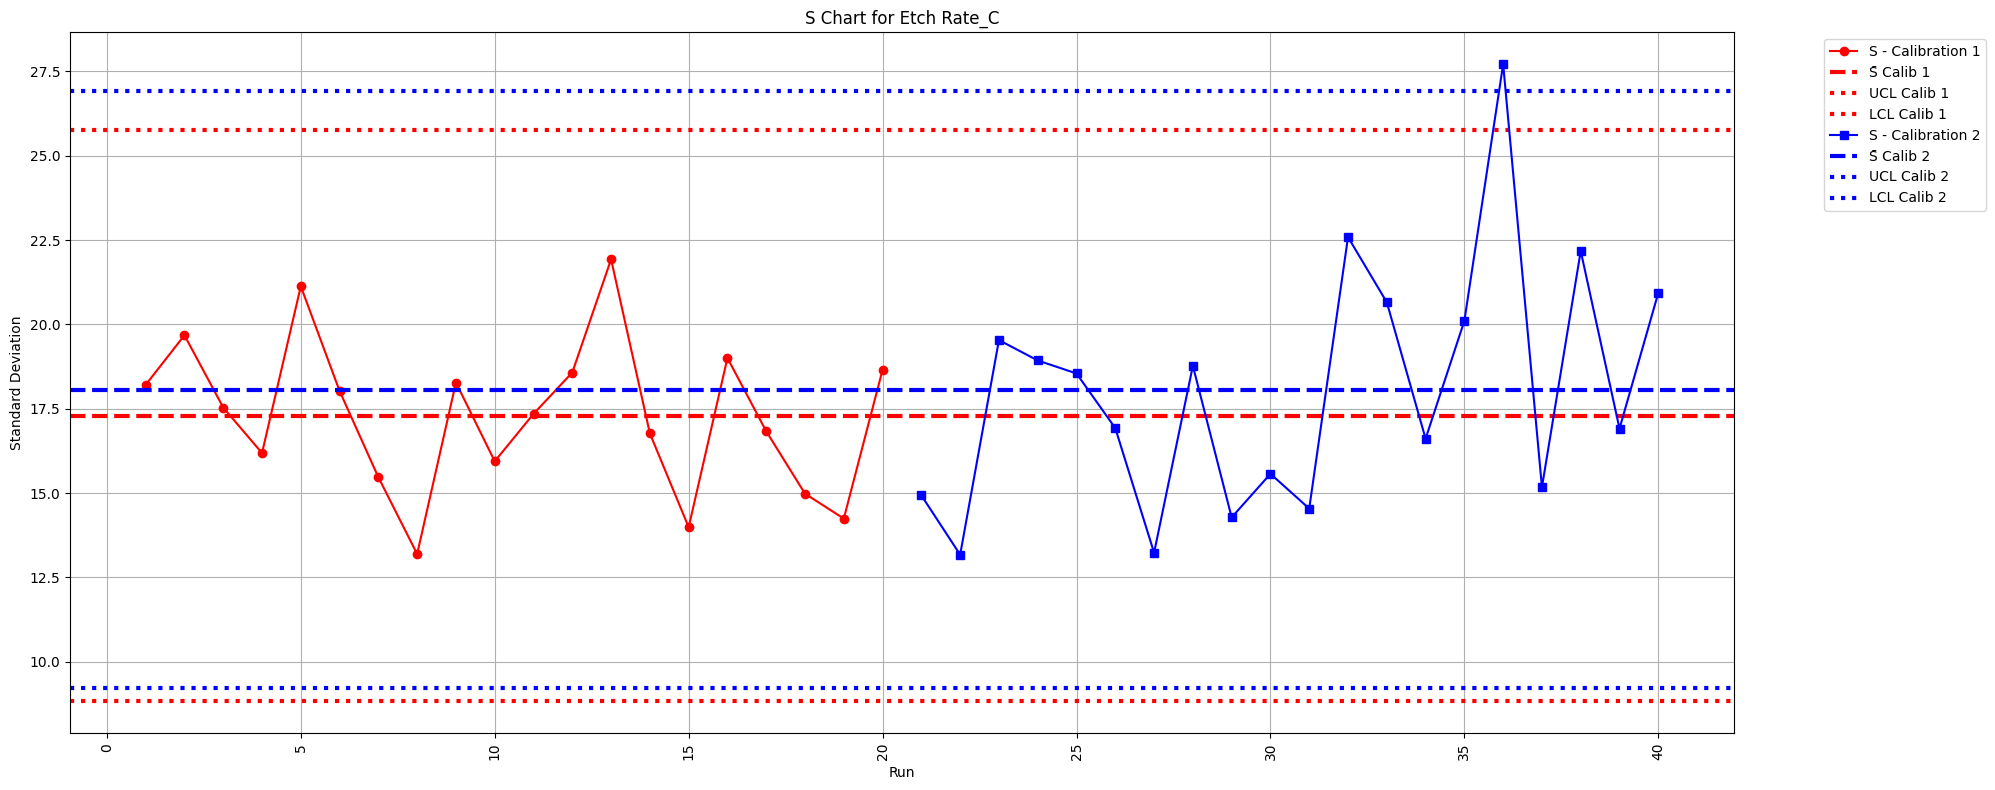

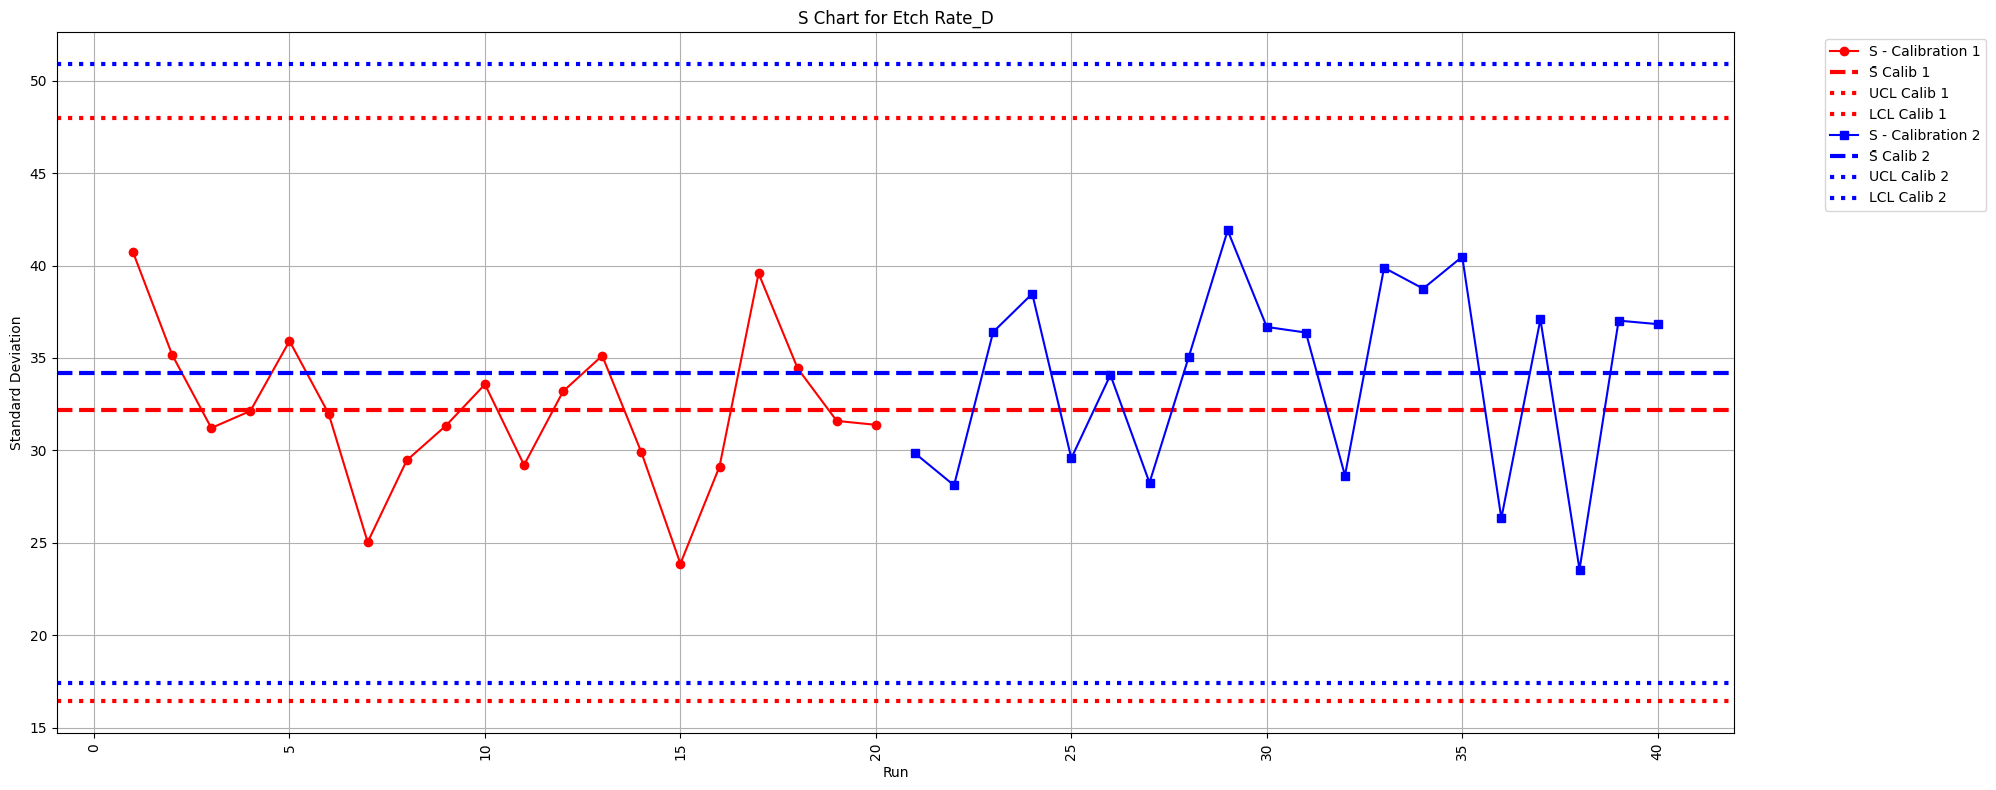

In [106]:
# Constants for S chart — need subgroup size (n) to pick right constants

n = 20
B3 = 0.5102  # For n=20 , to calculate LCL
B4 = 1.4897 # For n=20, to calculate UCL

def plot_s_chart_multiphase(df, column, calib_col='Calibration', run_col='Run', subgroup_size=20):
    plt.figure(figsize=(20, 8))

    colors = ['red', 'blue']
    markers = ['o', 's']

    for i, calib in enumerate(sorted(df[calib_col].unique())):  #get both the value of index and calibration by sorting them based on the unique valeu from the calibration column
        phase_data = df[df[calib_col] == calib]  #fliter the dataframe based on current calibration, example for loop 1 , the calibration is set as Calibration 1, onlt take row from calibration 1

        # Group into subgroups
        subgroups = [phase_data[column].iloc[i:i+subgroup_size]  # take data from 'column' with the size of the subgroup as the range
                     for i in range(0, len(phase_data), subgroup_size)  #generate iteration based on number of  data with subgroup size as steps
                     if len(phase_data[column].iloc[i:i+subgroup_size]) == subgroup_size] #ensure data with full subgroup size is chosen

        subgroup_stds = [g.std(ddof=1) for g in subgroups]  #Loop to Calculate sample std dev, ddof 1 meaning (n-1) in the denominator
        subgroup_labels = [phase_data[run_col].iloc[i] for i in range(0, len(phase_data), subgroup_size)  #return the 'Run' number from each data
                           if len(phase_data[column].iloc[i:i+subgroup_size]) == subgroup_size]

        # Mean of subgroup std deviations
        sbar = np.mean(subgroup_stds)
        ucl = B4 * sbar
        lcl = B3 * sbar

        plt.plot(
            subgroup_labels, # x value
            subgroup_stds, #y value
            marker=markers[i],
            color=colors[i],
            label=f'S - Calibration {calib}'
        )
        plt.axhline(sbar, color=colors[i], linestyle='--', linewidth=3, label=f'S̄ Calib {calib}')
        plt.axhline(ucl, color=colors[i], linestyle=':', linewidth=3, label=f'UCL Calib {calib}')
        plt.axhline(lcl, color=colors[i], linestyle=':', linewidth=3, label=f'LCL Calib {calib}')


    plt.title(f'S Chart for {column}')
    plt.xlabel('Run')
    plt.ylabel('Standard Deviation')
    plt.xticks(rotation=90)
    plt.grid(True)

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


# Example for your columns
for col in ['Etch Rate_B', 'Etch Rate_C', 'Etch Rate_D']:
    plot_s_chart_multiphase(df, col, subgroup_size=20)  # change subgroup_size if needed


###Etch Rate B S chart Explaination
S chart for Etch Rate B shows that both Calibration 1 and Calibration 2 are in statistical control, with all points falling within the control limits. Notably, the control limits for Calibration 2 are slightly narrower, indicating reduced variation compared to Calibration 1.

###Etch Rate C S chart Explaination
The X-bar & S charts for Etch Rate C indicate a lack of statistical control in both calibration phases. While the standard deviation remains largely within acceptable limits, the average etch rate frequently extends beyond 2 sigma and even breaches control zones, suggesting persistent process instability. This instability worsens when the dataset is expanded to the Run-Wafer level, where both mean and variability exhibit chaotic behaviour. In Calibration 1, the process exhibits a downward trend, which shown by the warning bar. The issue appears to be systemic rather than isolated.

###Etch Rate D S chart Explaination
S chart for Etch Rate D shows that both Calibration 1 and Calibration 2 are in statistical control, with all points falling within the control limits. Notably, the control limits for Calibration 2 are slightly wider, indicating increased variation compared to Calibration 1.

##X-bar chart (Between Run)

/tmp/ipython-input-1715741461.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_calib))


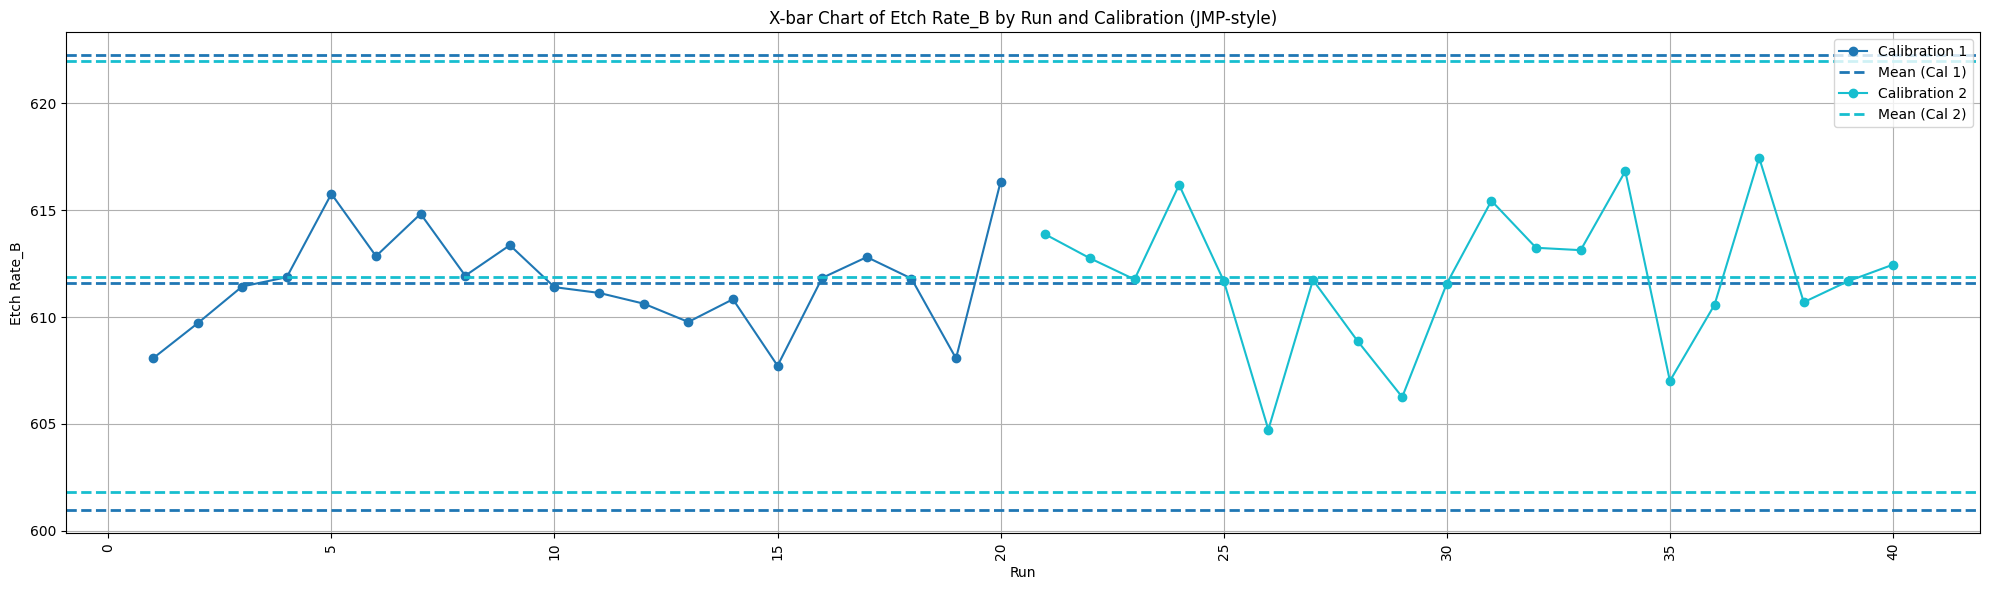

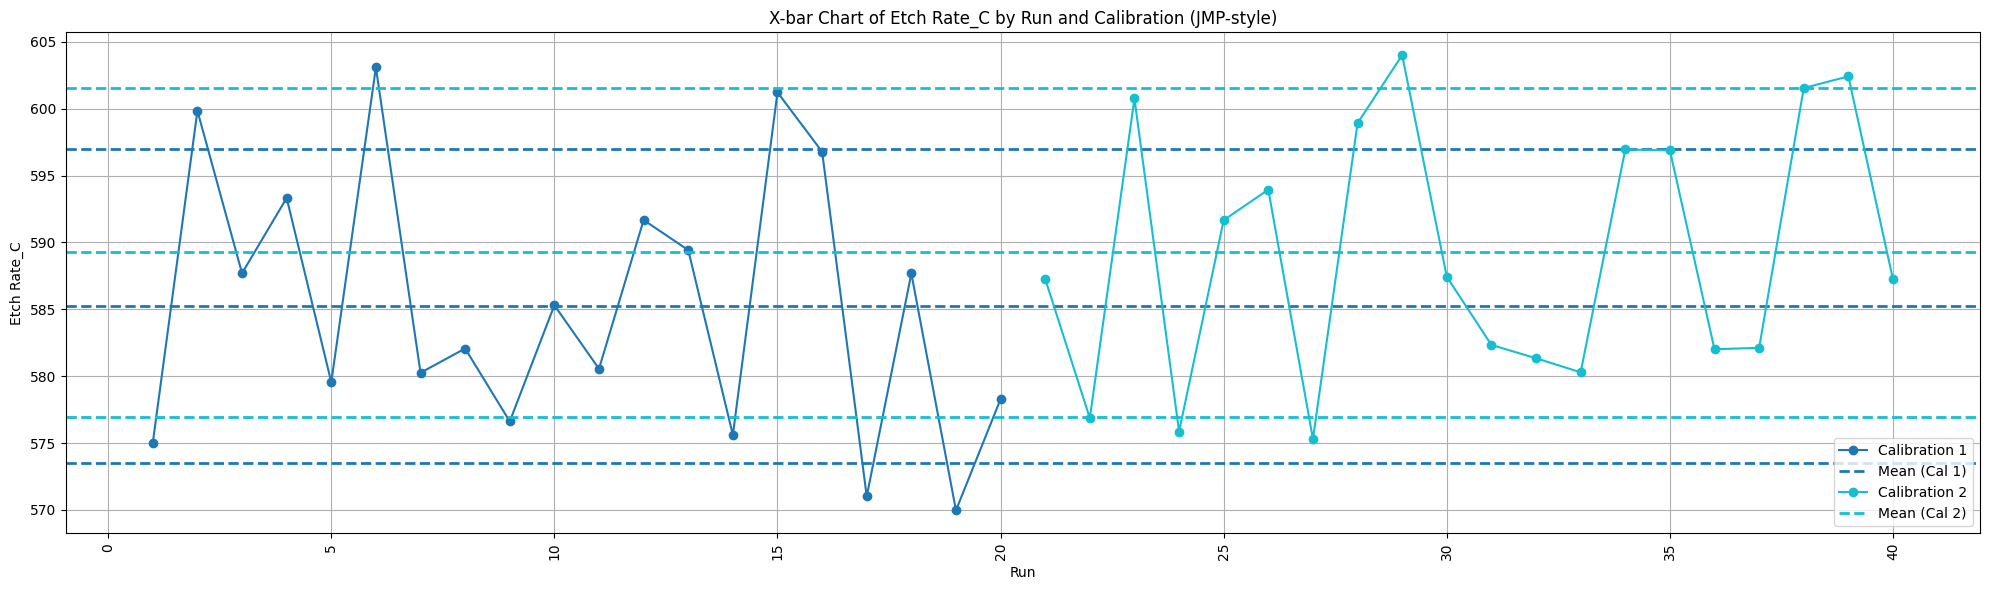

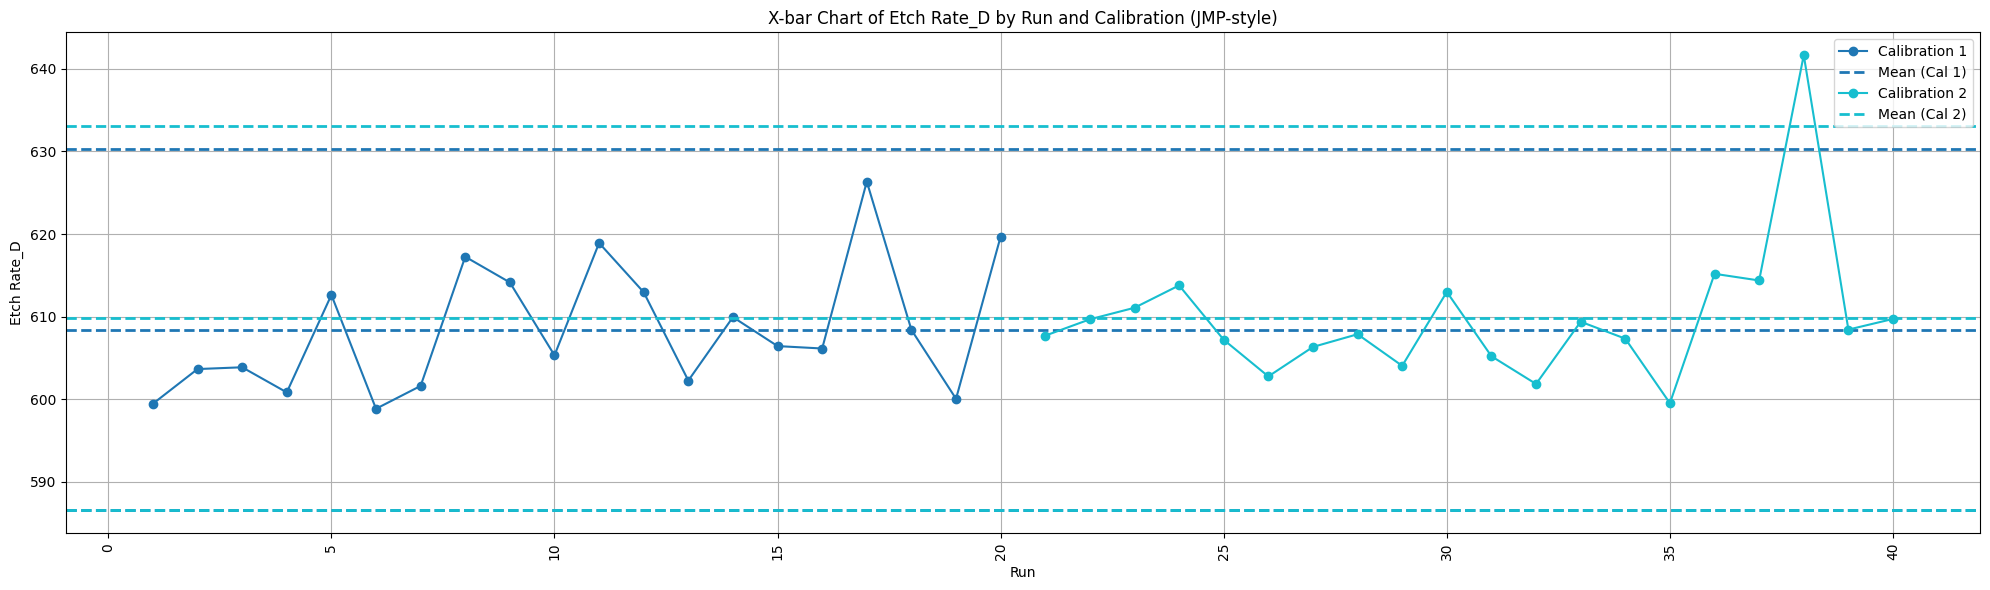

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import gamma

# Parameters
calib_col = 'Calibration'
run_col = 'Run'
value_cols = ['Etch Rate_B', 'Etch Rate_C', 'Etch Rate_D']

# Ensure Run is integer
df[run_col] = df[run_col].astype(int)

# Prepare color map
unique_calib = sorted(df[calib_col].unique())
colors = plt.cm.get_cmap('tab10', len(unique_calib))
color_map = {calib: colors(i) for i, calib in enumerate(unique_calib)}

# compute c4 function for bias correction
def c4(n):
    return np.sqrt(2/(n-1)) * gamma(n/2) / gamma((n-1)/2)

# Loop over each Etch Rate column
for value_col in value_cols:
    plt.figure(figsize=(20, 6))

    for calib in unique_calib:
        # Filter for this calibration
        phase_data = df[df[calib_col] == calib].sort_values(run_col)

        #compute Run-wise mean and subgroup std
        subgroup_stats = phase_data.groupby(run_col)[value_col].agg(['mean', 'std', 'count']).reset_index()

        run_numbers = subgroup_stats[run_col].values
        run_means = subgroup_stats['mean'].values
        subgroup_stds = subgroup_stats['std'].values
        subgroup_ns = subgroup_stats['count'].values

        # Apply bias correction for small subgroups
        # c4 depends on subgroup size (number of measurements per Run)
        c4_factors = np.array([c4(n) if n>1 else 1.0 for n in subgroup_ns])
        corrected_stds = subgroup_stds / c4_factors

        # --- Step 3: X-bar and S-bar ---
        xbar = np.mean(run_means)
        s_bar = np.mean(corrected_stds)

        # UCL and LCL
        # n_avg = average number of measurements per subgroup (Run)
        n_avg = np.mean(subgroup_ns)
        ucl = xbar + 3 * (s_bar / np.sqrt(n_avg))
        lcl = xbar - 3 * (s_bar / np.sqrt(n_avg))

        # plot the y vaalue
        plt.plot(run_numbers, run_means, marker='o', linestyle='-', color=color_map[calib],
                 label=f"Calibration {calib}")

        # plot control lines
        plt.axhline(xbar, color=color_map[calib], linestyle='--', linewidth=2, label=f"Mean (Cal {calib})")
        plt.axhline(ucl, color=color_map[calib], linestyle='--', linewidth=2)
        plt.axhline(lcl, color=color_map[calib], linestyle='--', linewidth=2)

    plt.xlabel("Run")
    plt.ylabel(value_col)
    plt.title(f"X-bar Chart of {value_col} by Run and Calibration ")
    plt.grid(True)
    plt.xticks(rotation=90)
    plt.legend()
    plt.tight_layout()
    plt.show()


### Etch Rate B X bar Chart Explaination
For X-bar chart, the average etch rate for Calibration 1 remains stable and well within control limits. However, during Calibration 2, the process shows greater fluctuation, with six points falling within the warning (yellow) region and 1 point [Run 26] significantly outside beyond the 2 sigma which violated the Rule 1 2S of Westgard Rule. While these points are not out of control, their clustering may suggest a potential shift or increased variability that warrants monitoring. Another control chart is required to examine the within-wafer variation as further investigation.

### Etch Rate C X Bar Chart Explaination
The X-bar for Etch Rate C indicate a lack of statistical control in both calibration phases. While the standard deviation remains largely within acceptable limits, the average etch rate frequently extends beyond 2 sigma and even breaches control zones, suggesting persistent process instability.

### Etch Rate D X bar Chart Explaination
On the X-bar chart, the average etch rate for Calibration 1 exhibits consistent oscillation except for 1 point [Run 17] beyond the 2-sigma region while within the control limits. It’s likely just normal process noise. Calibration 2 shows a stable and consistent trend overall, except for a spike beyond the control limit in Run 38. This spike indicates a special cause variation as S chart is stable, excluding the possibility of increased variation.

# S chart (Between Run-Wafers)

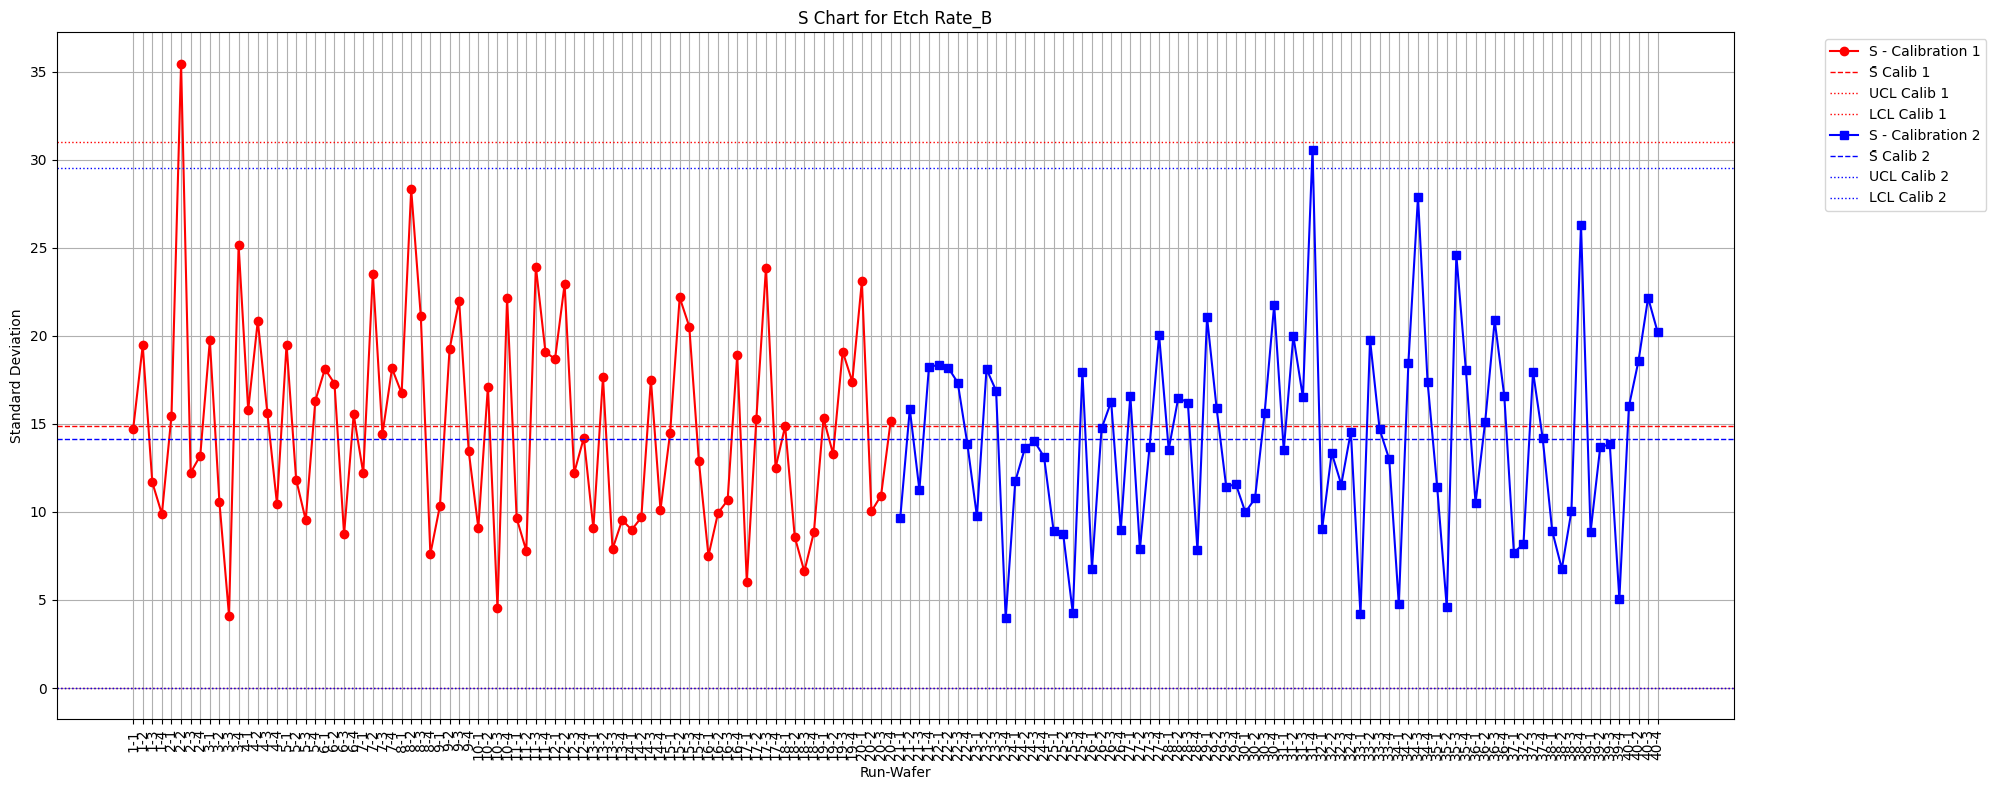

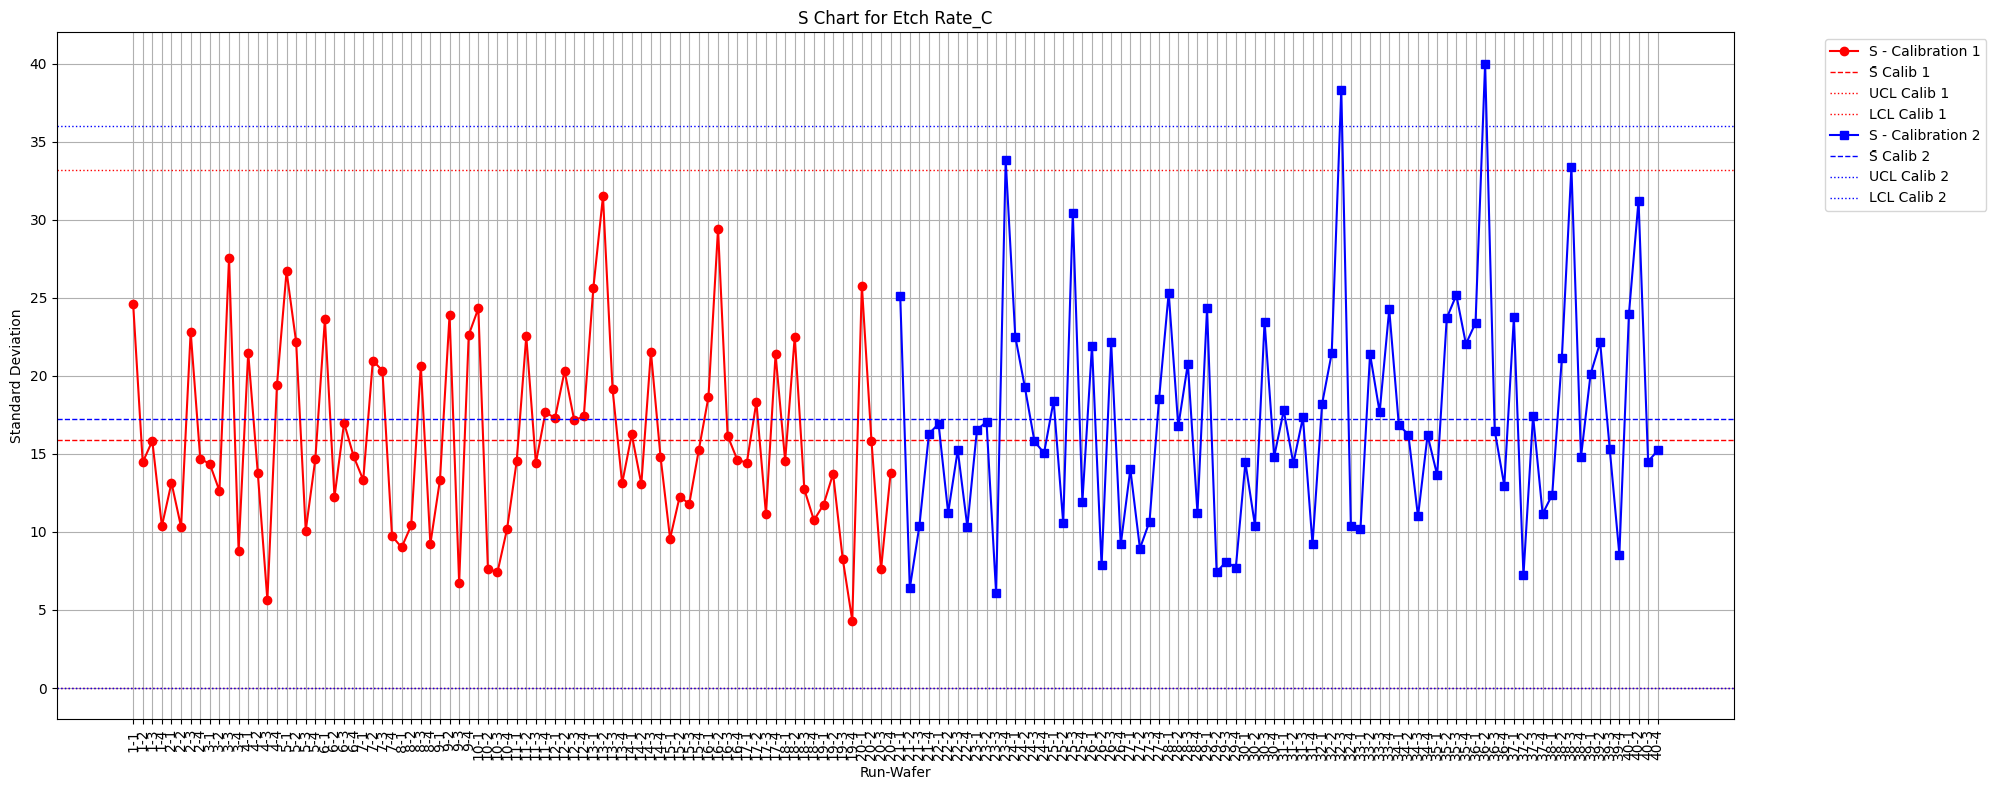

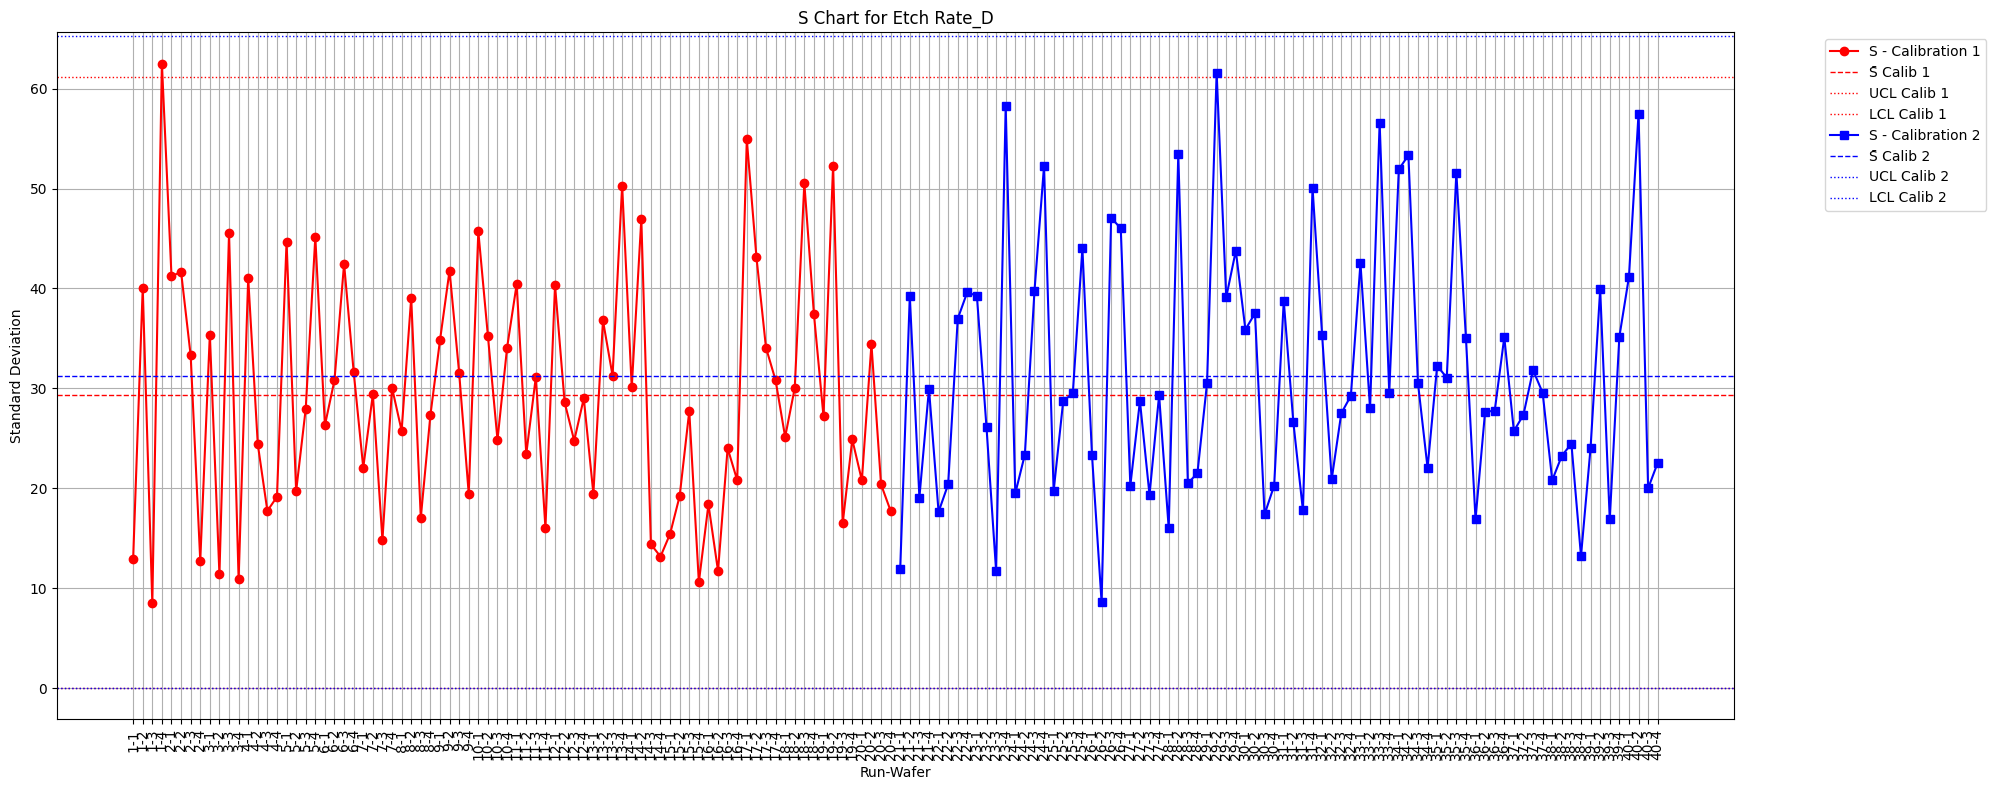

In [108]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


n = 5
B3 = 0  # For n=5, to calculate LCL
B4 = 2.089  # For n=5, to calculate UCL

def plot_s_chart_multiphase(df, column, calib_col='Calibration', run_col='Run-Wafer', subgroup_size=5):
    plt.figure(figsize=(20, 8))

    colors = ['red', 'blue']
    markers = ['o', 's']

    for i, calib in enumerate(sorted(df[calib_col].unique())):
        phase_data = df[df[calib_col] == calib]

        # Group into subgroups
        subgroups = [phase_data[column].iloc[i:i+subgroup_size]
                     for i in range(0, len(phase_data), subgroup_size)
                     if len(phase_data[column].iloc[i:i+subgroup_size]) == subgroup_size]

        subgroup_stds = [g.std(ddof=1) for g in subgroups]  # sample std dev
        subgroup_labels = [phase_data[run_col].iloc[i] for i in range(0, len(phase_data), subgroup_size)
                           if len(phase_data[column].iloc[i:i+subgroup_size]) == subgroup_size]

        # Mean of subgroup std deviations
        sbar = np.mean(subgroup_stds)
        ucl = B4 * sbar
        lcl = B3 * sbar

        plt.plot(
            subgroup_labels,
            subgroup_stds,
            marker=markers[i],
            color=colors[i],
            label=f'S - Calibration {calib}'
        )
        plt.axhline(sbar, color=colors[i], linestyle='--', linewidth=1, label=f'S̄ Calib {calib}')
        plt.axhline(ucl, color=colors[i], linestyle=':', linewidth=1, label=f'UCL Calib {calib}')
        plt.axhline(lcl, color=colors[i], linestyle=':', linewidth=1, label=f'LCL Calib {calib}')

    plt.title(f'S Chart for {column}')
    plt.xlabel('Run-Wafer')
    plt.ylabel('Standard Deviation')
    plt.xticks(rotation=90)
    plt.grid(True)

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


# Example for your columns
for col in ['Etch Rate_B', 'Etch Rate_C', 'Etch Rate_D']:
    plot_s_chart_multiphase(df, col, subgroup_size=5)

# X-bar Chart (Between Run Wafers)

/tmp/ipython-input-3027678465.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_calib))


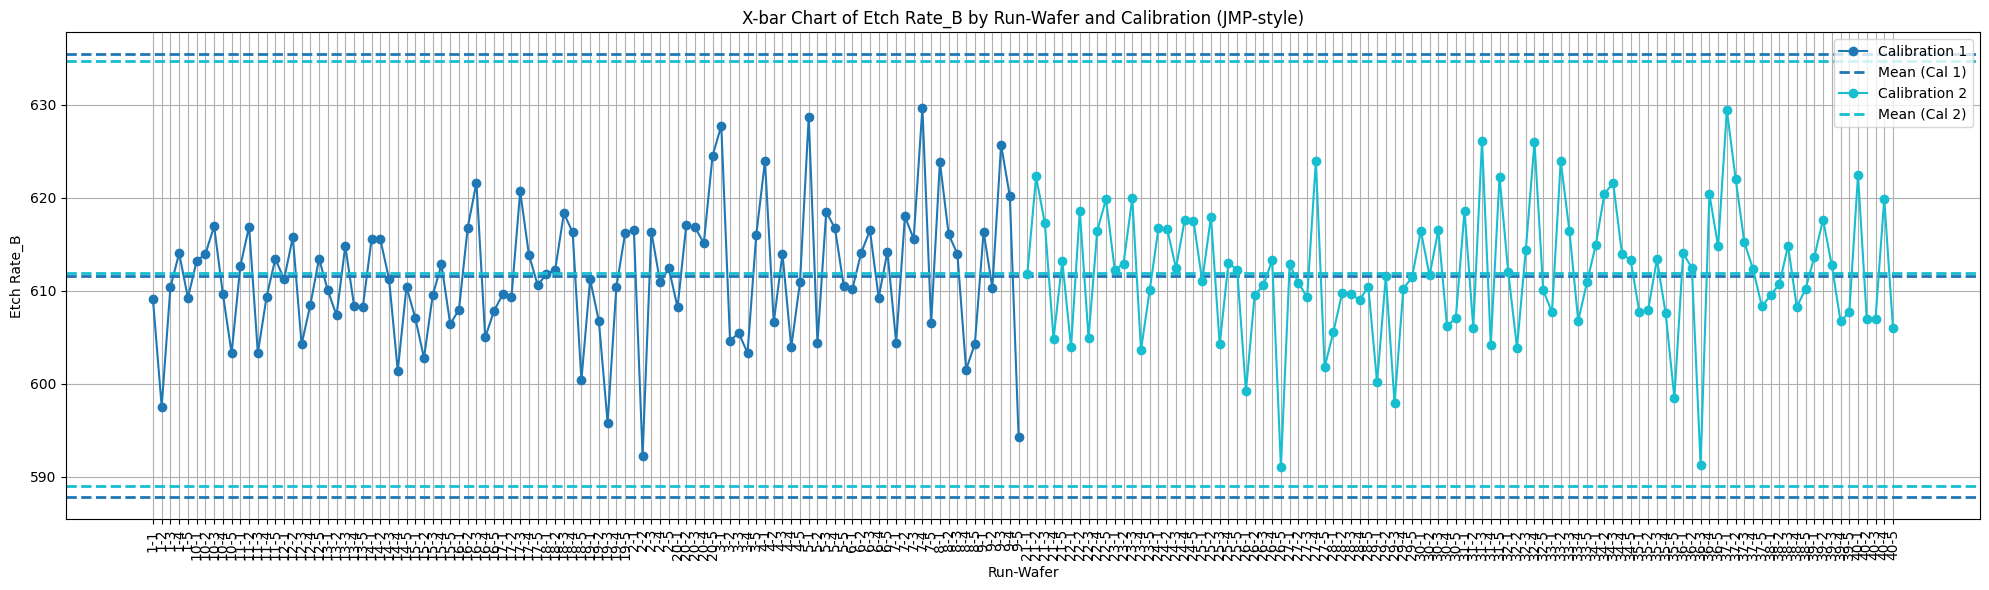

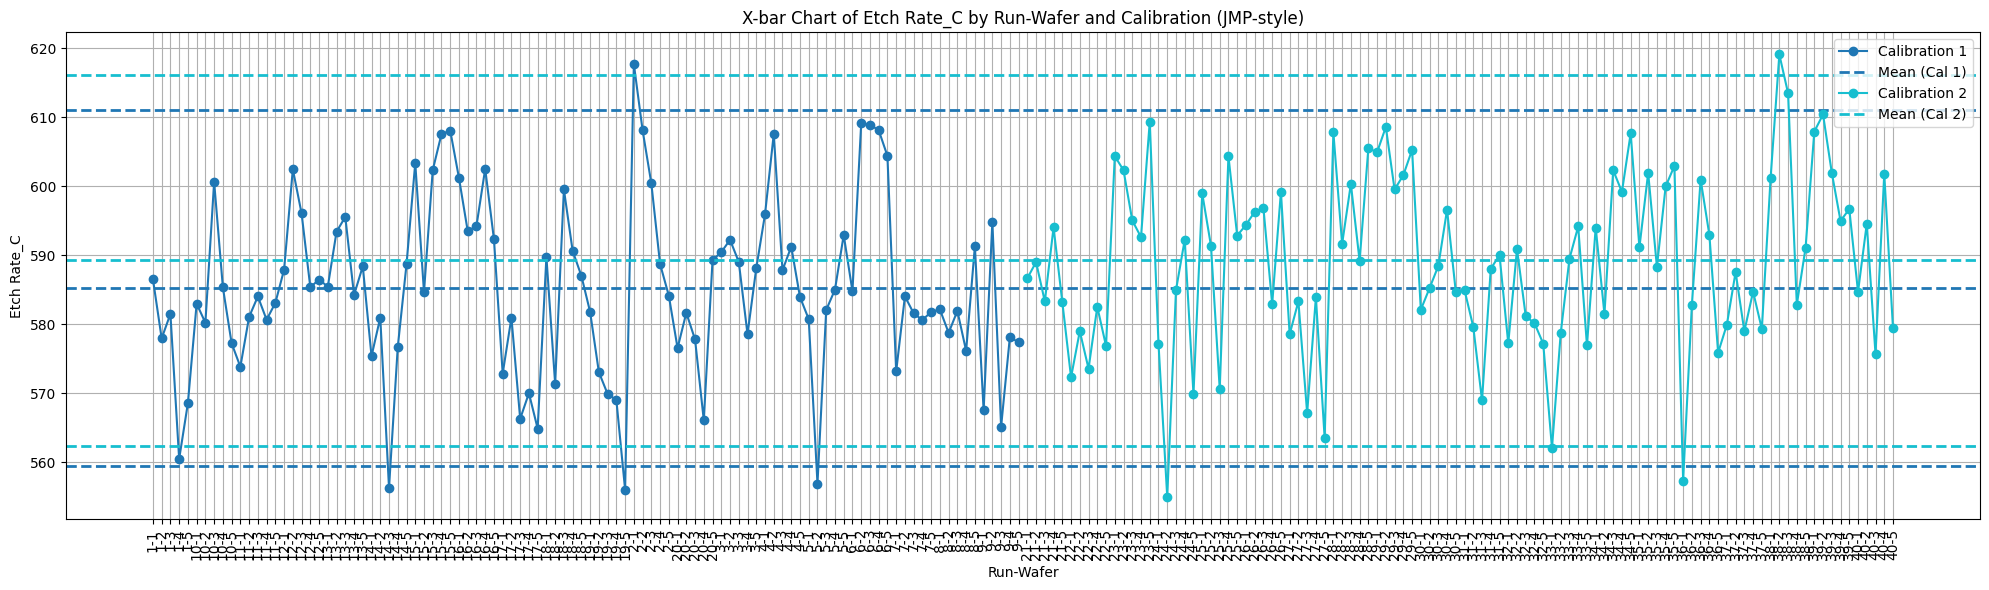

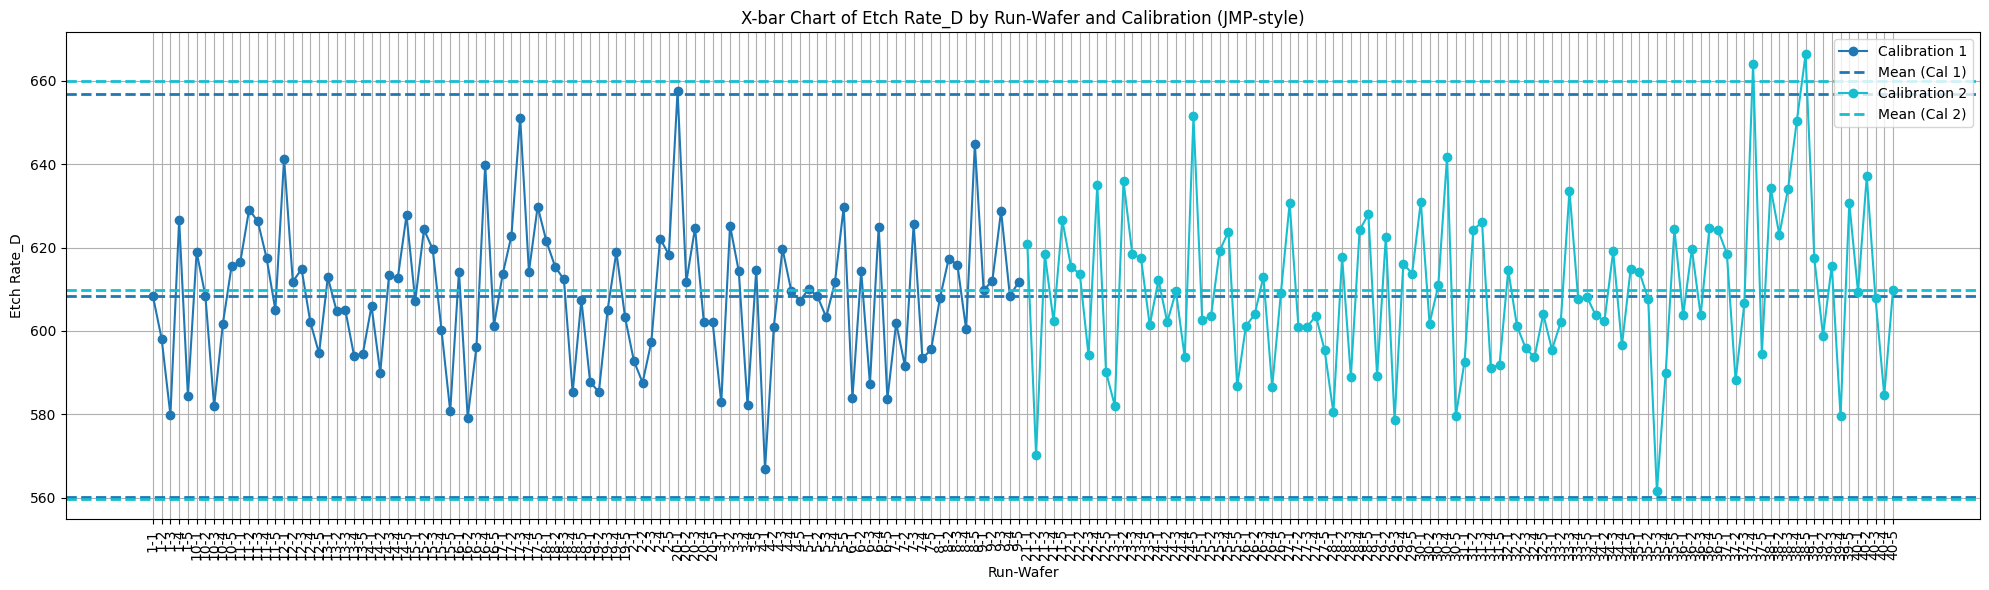

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import gamma

# --- Parameters ---
calib_col = 'Calibration'
run_wafer_col = 'Run-Wafer'
value_cols = ['Etch Rate_B', 'Etch Rate_C', 'Etch Rate_D']

# split 'Run-Wafer' column to treate them as integer for sorting
if 'Run-Wafer' not in df.columns and 'Run-Wafer' in df:
    df[['Run', 'Wafer']] = df['Run-Wafer'].str.split('-', expand=True)
    df['Run'] = df['Run'].astype(int)
    df['Wafer'] = df['Wafer'].astype(int)
    df[run_wafer_col] = df['Run'].astype(str) + '-' + df['Wafer'].astype(str)

# Prepare color map
unique_calib = sorted(df[calib_col].unique())
colors = plt.cm.get_cmap('tab10', len(unique_calib))
color_map = {calib: colors(i) for i, calib in enumerate(unique_calib)}

# function to calculate c4 factor
def c4(n):
    return np.sqrt(2/(n-1)) * gamma(n/2) / gamma((n-1)/2)

# Loop over each Etch Rate column
for value_col in value_cols:
    plt.figure(figsize=(20, 6))

    for calib in unique_calib:
        # calibration filter
        phase_data = df[df[calib_col] == calib].sort_values(run_wafer_col)

        # mean and standard deviation
        subgroup_stats = phase_data.groupby(run_wafer_col)[value_col].agg(['mean', 'std', 'count']).reset_index()

        run_wafer_numbers = subgroup_stats[run_wafer_col].values
        run_wafer_means = subgroup_stats['mean'].values
        subgroup_stds = subgroup_stats['std'].values
        subgroup_ns = subgroup_stats['count'].values

        # bias correction factor c4
        c4_factors = np.array([c4(n) if n>1 else 1.0 for n in subgroup_ns])
        corrected_stds = subgroup_stds / c4_factors

        # X bar and S bar
        xbar = np.mean(run_wafer_means)
        s_bar = np.mean(corrected_stds)

        # UCL and LCL calculation
        n_avg = np.mean(subgroup_ns)
        ucl = xbar + 3 * (s_bar / np.sqrt(n_avg))
        lcl = xbar - 3 * (s_bar / np.sqrt(n_avg))

        # plot y value
        plt.plot(run_wafer_numbers, run_wafer_means, marker='o', linestyle='-', color=color_map[calib],
                 label=f"Calibration {calib}")

        # control limit
        plt.axhline(xbar, color=color_map[calib], linestyle='--', linewidth=2, label=f"Mean (Cal {calib})")
        plt.axhline(ucl, color=color_map[calib], linestyle='--', linewidth=2)
        plt.axhline(lcl, color=color_map[calib], linestyle='--', linewidth=2)

    plt.xlabel("Run-Wafer")
    plt.ylabel(value_col)
    plt.title(f"X-bar Chart of {value_col} by Run-Wafer and Calibration (JMP-style)")
    plt.grid(True)
    plt.xticks(rotation=90)
    plt.legend()
    plt.tight_layout()
    plt.show()


## Explaination for Control Chart (between Run-Wafers)

In the S chart, Calibration 1 shows one out-of-control points and several points approaching the control limits, while Calibration 2 also shows two outliers and one point near the upper control limit. These observations suggest that the within-run variation is unstable, indicating inconsistency among wafers within the same run.

The X-bar chart for both calibrations exhibits large fluctuations, with many points fallings within the 2-sigma region as indicated by red circles. This reflects potential shifts or inherent variability similar to those observed. In conclusion, the variation in Etch Rate B appears to be primarily driven by within-wafer inconsistency rather than between-run differences. The control charts highlight that while the process may seem stable at the run level, it is not fully under statistical control at the wafer level, undermining process reliability.


The X-bar & S charts for Etch Rate C in both Between Run and Between Run-Wafer indicate a lack of statistical control in both calibration phases. While the standard deviation remains largely within acceptable limits, the average etch rate frequently extends beyond 2 sigma and even breaches control zones, suggesting persistent process instability. This instability worsens when the dataset is expanded to the Run-Wafer level, where both mean and variability exhibit chaotic behaviour. In Calibration 1, the process exhibits a downward trend, which shown by the warning bar. The issue appears to be systemic rather than isolated.

In the Etch Rate D S chart, one point touches the upper control limit, indicating borderline variation. The X-bar chart reveals one outlier in Calibration 1 and two outliers which contribute to the spike in Calibration 2. Moreover, numerous points in the yellow region have been observed in both calibrations, suggesting potential process shifts or instability. This implies that although the variability may appear somewhat consistent, the mean etch rate per wafer fluctuates significantly across runs, pointing to a lack of control at the wafer level. Overall, this reinforces the presence of within-wafer inconsistency, making the process statistically unstable.

# Justification for Absence of Process Capability
Process capability is infeasible for this case study. Generally speaking, process capability should be proceeded only if the sample passed the control chart test as process capability assumes the process is already stable and Cpk and Ppk will be misleading for unstable case.  

# Recommendations
Based on the methods conducted above, we can conclude that all three etch rate are not stable due to special cause effect such as tool drift as observed in the X bar chart within wafer between run of each etch rate. Hence, several recommendations or corrective action should be taken to rectify this issue.
1. Root Cause Analysis
•	Root cause analysis with the aid of tool such as Fishbone Diagram should be carried out to determine and eliminate the special causes.
2. Improve Process Monitoring
•	Real-time Statistical Process Control (SPC) should be implemented to for earlier issue identification.
•	Use subgrouping by shift, machine, or operator to identify potential hidden patterns of variation.
3. Collect Additional Data
•	Environmental variables such as temperature, humidity, or other setup conditions that may affect the variation should be recorded.
•	Comparative study and observation of process behaviours before and after maintenance to see any improvements made.
4. Assess Measurement System
•	Gage R&R study should be performed to ensure reliable measurement system.
5. Conduct Designed Experiments (DOE)
•	If root causes remain unclear, use DOE techniques to study the effects of several key variables for a more comprehensive understanding and allow optimisation.


# CONCLUSION
Based on this case study, the processes for Etch Rate B, C and D are not in statistical control as observed from the out-of-control point in the control chart. The process performance cannot be generalised for now due to the instability of the processes. Moreover, the process capability study cannot be interpreted as well. This is because of the presence of special cause variation, which leads to inaccuracy of results and misinterpretation of true performance. This analysis emphasises that process stabilisation should be prioritised before the process can be validated for production.

#Reference

Potcner, K, (2025) “JMP064: Variation in Semiconductor Etching Process”, SAS. Available at: https://www.jmp.com/en/academic/case-study-library/resource-listings/view-all



# Appendix

/tmp/ipython-input-1304727842.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_calib))


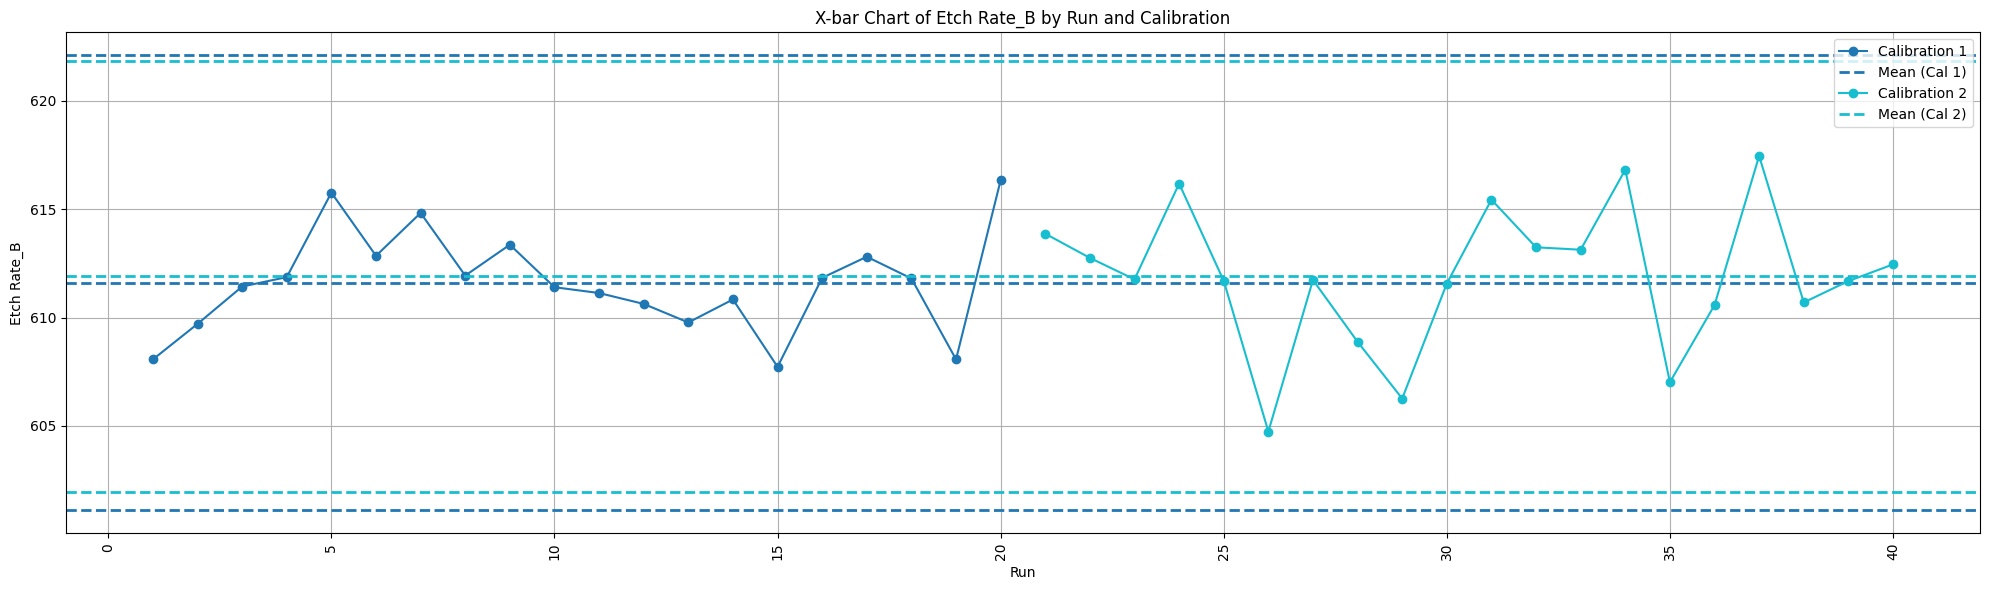

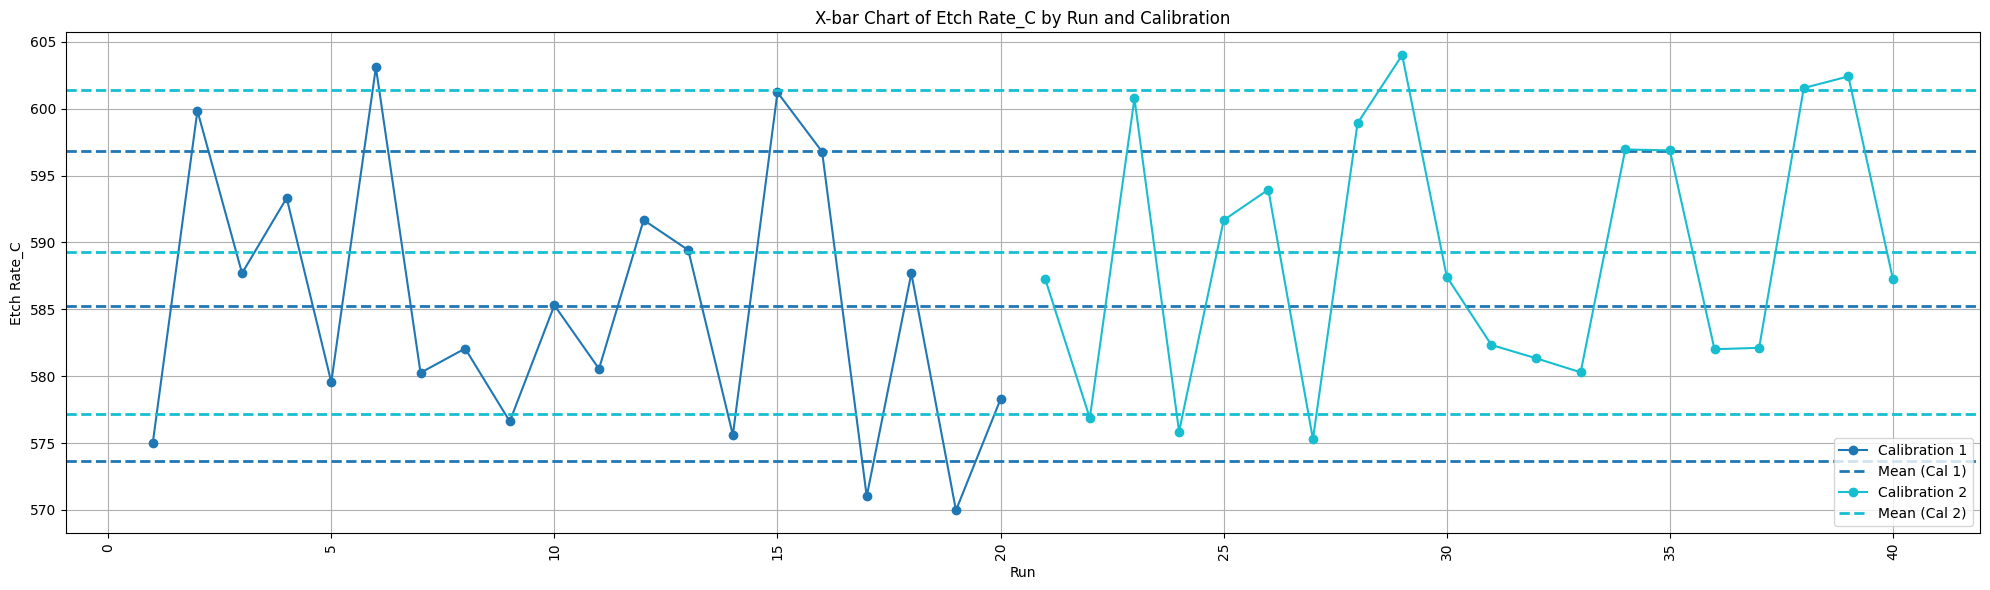

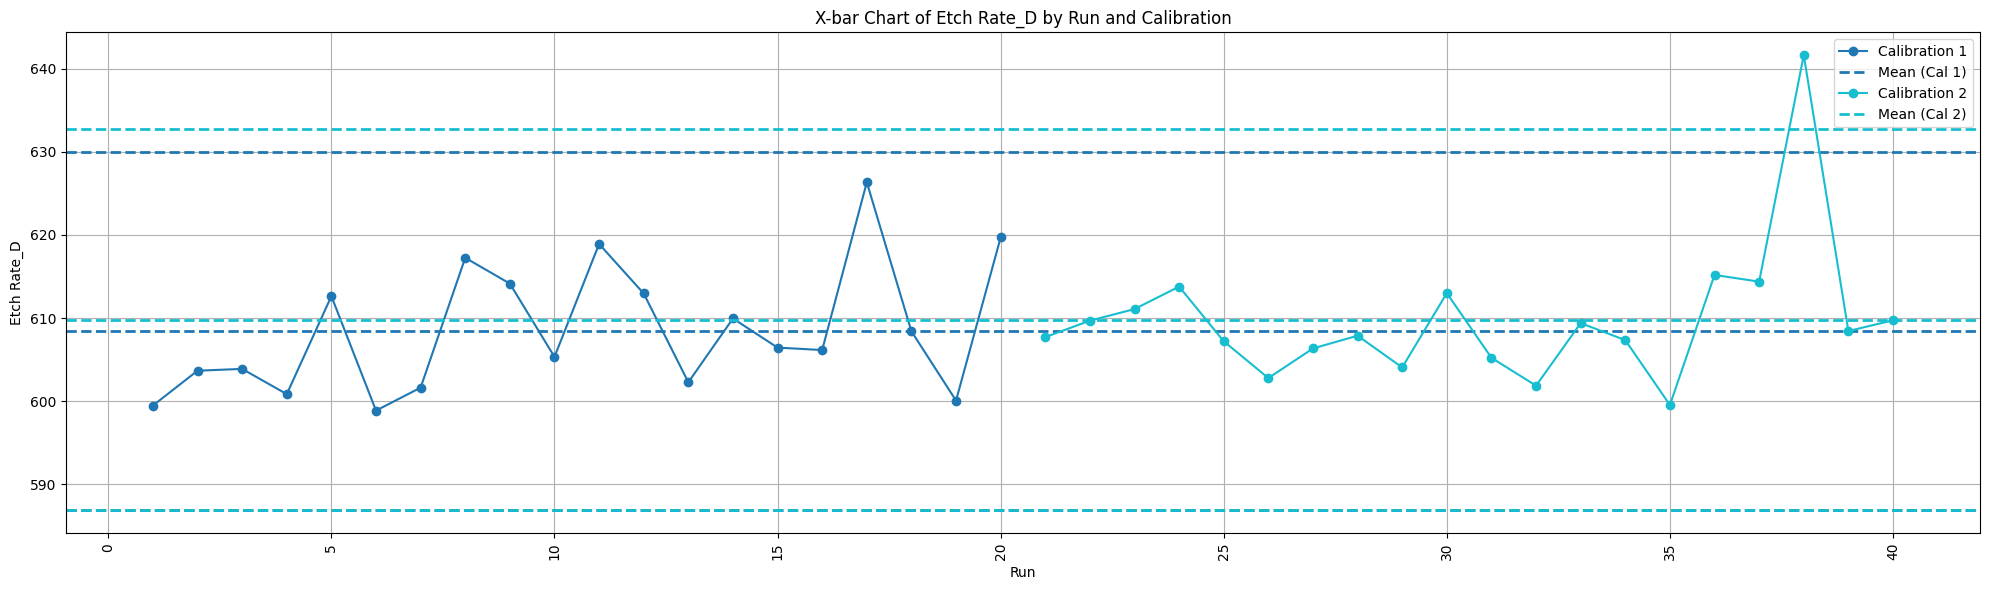

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


calib_col = 'Calibration'
run_col = 'Run'
value_cols = ['Etch Rate_B', 'Etch Rate_C', 'Etch Rate_D']
subgroup_size = 20  # number of raw measurements per subgroup (for UCL/LCL)

# Ensure Run is integer
df[run_col] = df[run_col].astype(int)

# Prepare color map
unique_calib = sorted(df[calib_col].unique())
colors = plt.cm.get_cmap('tab10', len(unique_calib))
color_map = {calib: colors(i) for i, calib in enumerate(unique_calib)}

# Loop over each Etch Rate column
for value_col in value_cols:
    plt.figure(figsize=(20, 6))

    for calib in unique_calib:
        # Filter raw data for this calibration
        phase_data = df[df[calib_col] == calib].sort_values(run_col)

        # mean calculation
        df_run_mean = phase_data.groupby(run_col, as_index=False)[value_col].mean()
        run_means = df_run_mean[value_col].values
        run_numbers = df_run_mean[run_col].values

        # UCL and LCL calculation
        raw_values = phase_data[value_col].values
        subgroups = [raw_values[i:i+subgroup_size] for i in range(0, len(raw_values), subgroup_size)
                     if len(raw_values[i:i+subgroup_size]) == subgroup_size]

        subgroup_means = [np.mean(g) for g in subgroups]
        subgroup_stds = [np.std(g, ddof=1) for g in subgroups]

        xbar = np.mean(subgroup_means)
        s_bar = np.mean(subgroup_stds)

        ucl = xbar + 3 * (s_bar / np.sqrt(subgroup_size))
        lcl = xbar - 3 * (s_bar / np.sqrt(subgroup_size))

        #plot y value point
        plt.plot(run_numbers, run_means, marker='o', linestyle='-', color=color_map[calib],
                 label=f"Calibration {calib}")

        # control limit
        plt.axhline(xbar, color=color_map[calib], linestyle='--', linewidth=2, label=f"Mean (Cal {calib})")
        plt.axhline(ucl, color=color_map[calib], linestyle='--', linewidth=2)
        plt.axhline(lcl, color=color_map[calib], linestyle='--', linewidth=2)

    plt.xlabel("Run")
    plt.ylabel(value_col)
    plt.title(f"X-bar Chart of {value_col} by Run and Calibration")
    plt.grid(True)
    plt.xticks(rotation=90)
    plt.legend()
    plt.tight_layout()
    plt.show()


/tmp/ipython-input-1715741461.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_calib))


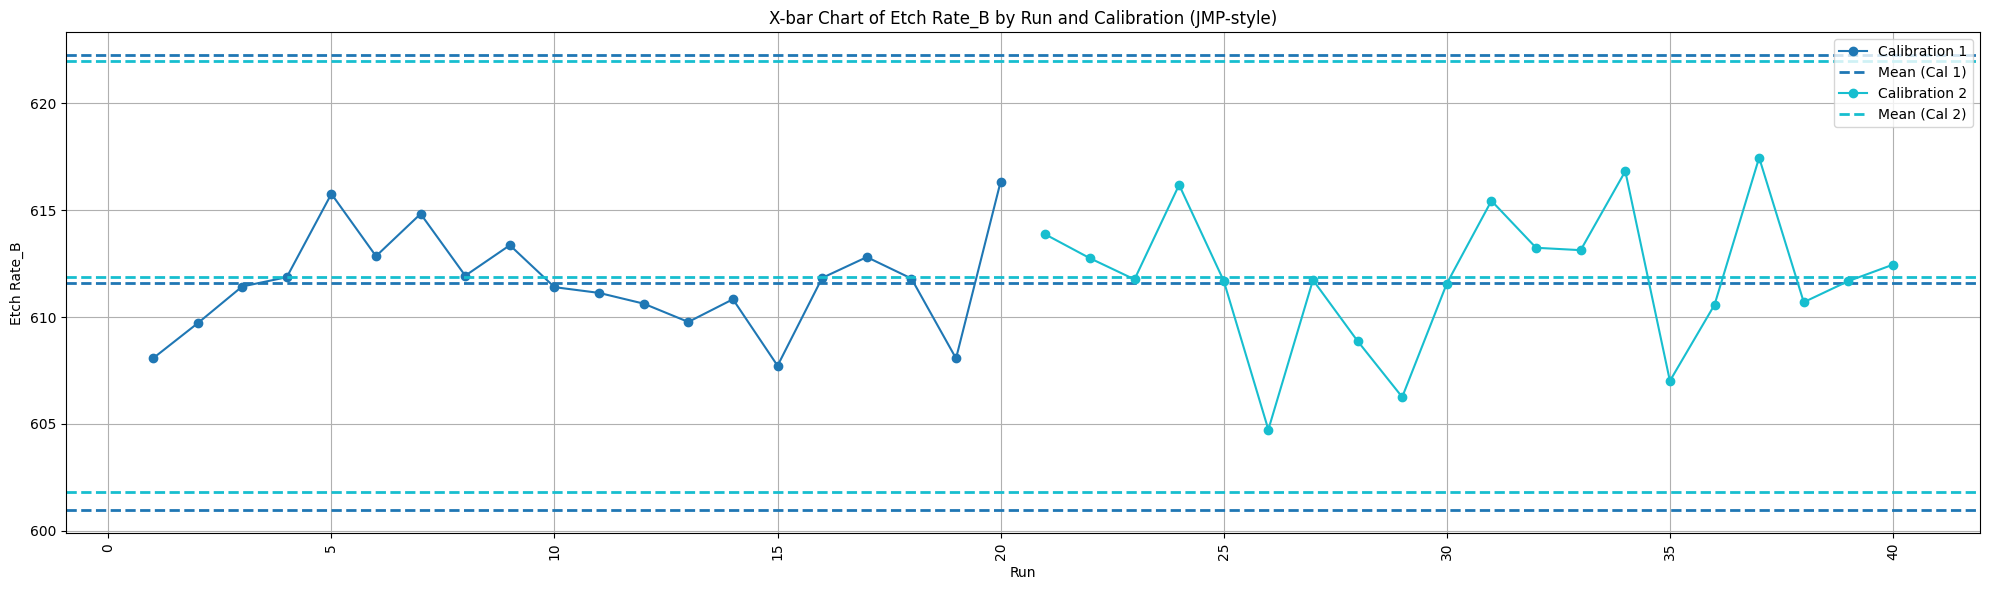

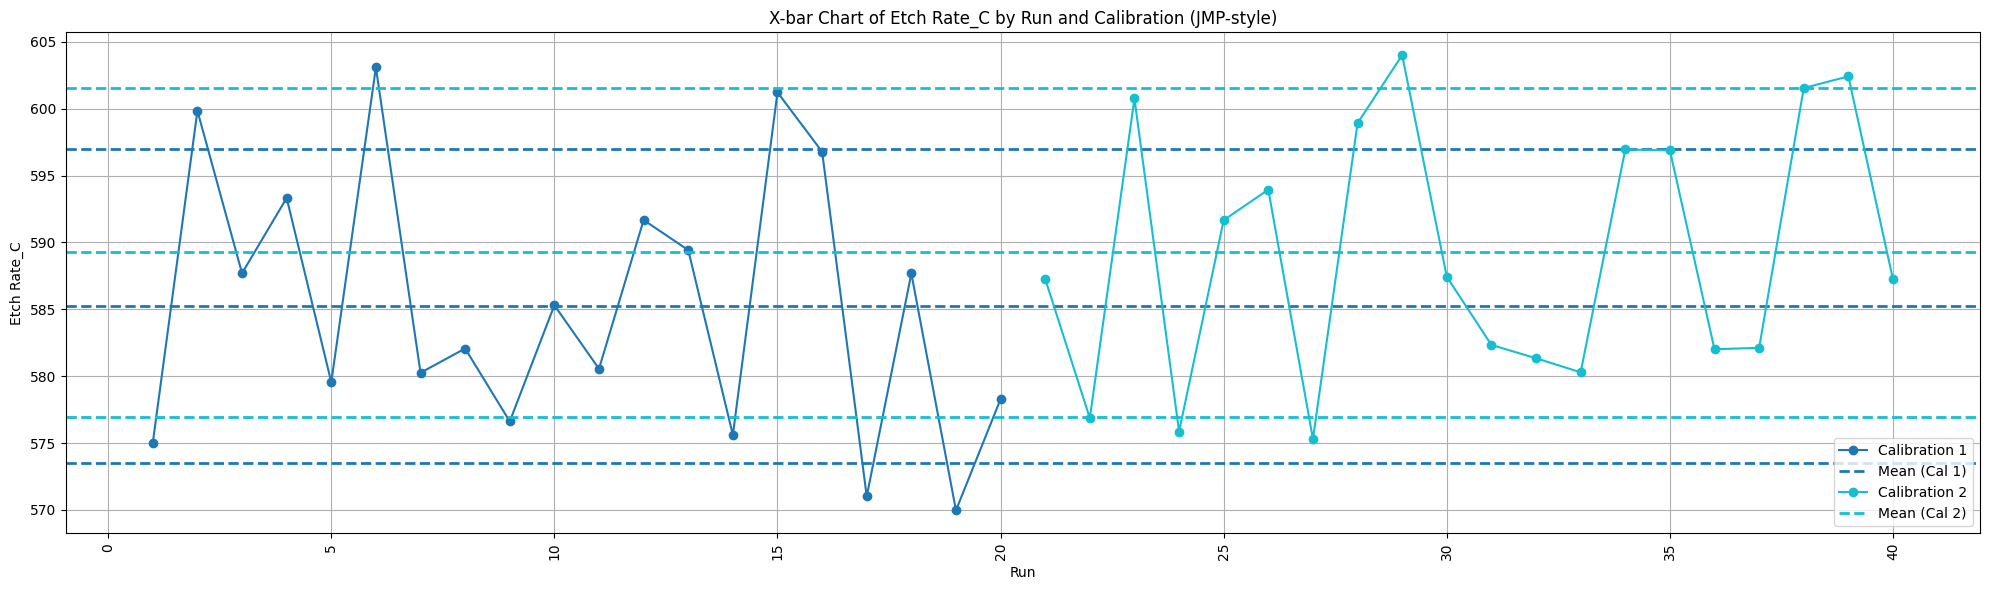

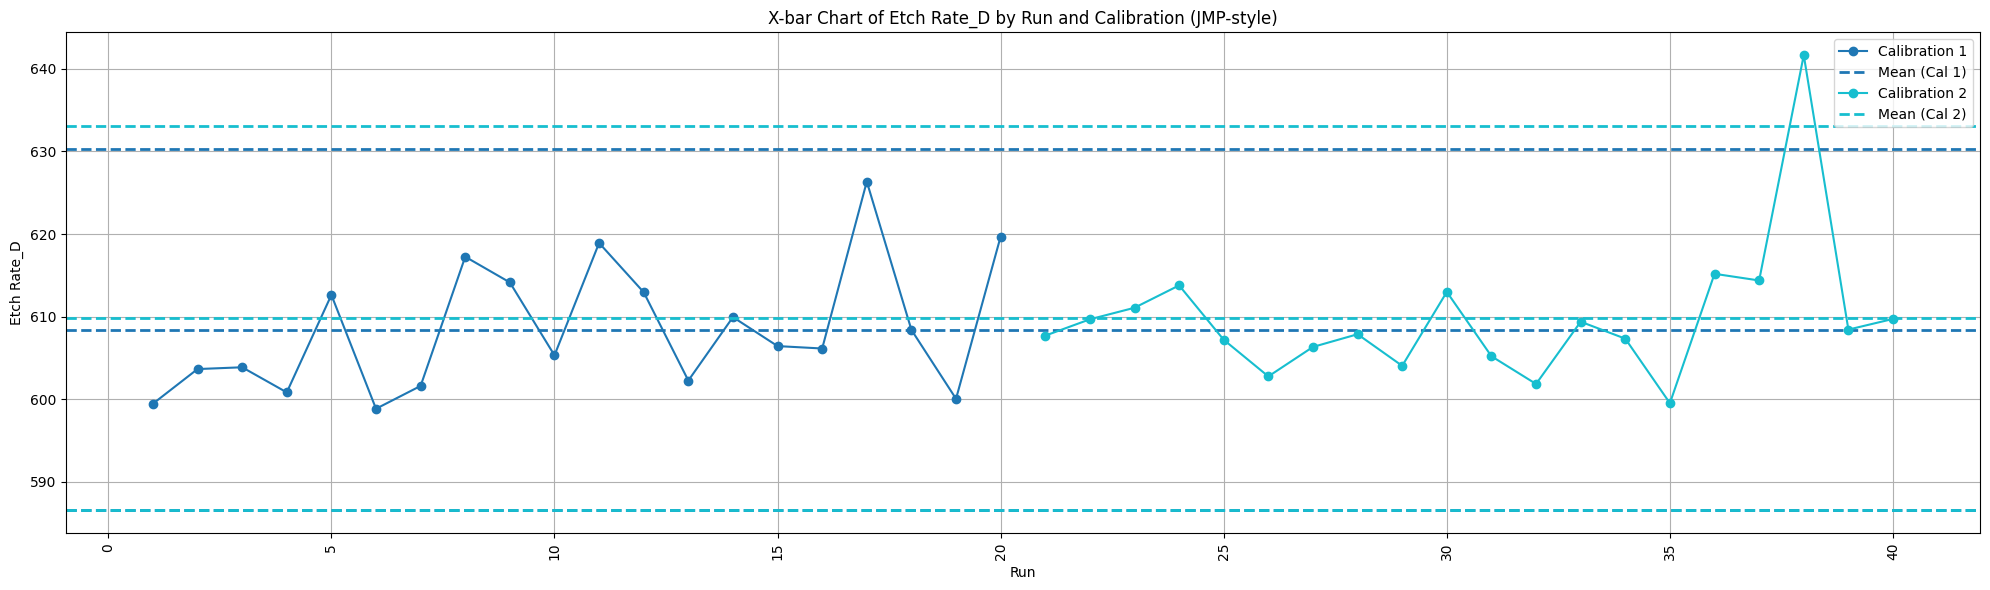

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import gamma

# Parameters
calib_col = 'Calibration'
run_col = 'Run'
value_cols = ['Etch Rate_B', 'Etch Rate_C', 'Etch Rate_D']

# Ensure Run is integer
df[run_col] = df[run_col].astype(int)

# Prepare color map
unique_calib = sorted(df[calib_col].unique())
colors = plt.cm.get_cmap('tab10', len(unique_calib))
color_map = {calib: colors(i) for i, calib in enumerate(unique_calib)}

# compute c4 function for bias correction
def c4(n):
    return np.sqrt(2/(n-1)) * gamma(n/2) / gamma((n-1)/2)

# Loop over each Etch Rate column
for value_col in value_cols:
    plt.figure(figsize=(20, 6))

    for calib in unique_calib:
        # Filter for this calibration
        phase_data = df[df[calib_col] == calib].sort_values(run_col)

        #compute Run-wise mean and subgroup std
        subgroup_stats = phase_data.groupby(run_col)[value_col].agg(['mean', 'std', 'count']).reset_index()

        run_numbers = subgroup_stats[run_col].values
        run_means = subgroup_stats['mean'].values
        subgroup_stds = subgroup_stats['std'].values
        subgroup_ns = subgroup_stats['count'].values

        # Apply bias correction for small subgroups
        # c4 depends on subgroup size (number of measurements per Run)
        c4_factors = np.array([c4(n) if n>1 else 1.0 for n in subgroup_ns])
        corrected_stds = subgroup_stds / c4_factors

        # --- Step 3: X-bar and S-bar ---
        xbar = np.mean(run_means)
        s_bar = np.mean(corrected_stds)

        # UCL and LCL
        # n_avg = average number of measurements per subgroup (Run)
        n_avg = np.mean(subgroup_ns)
        ucl = xbar + 3 * (s_bar / np.sqrt(n_avg))
        lcl = xbar - 3 * (s_bar / np.sqrt(n_avg))

        # plot the y vaalue
        plt.plot(run_numbers, run_means, marker='o', linestyle='-', color=color_map[calib],
                 label=f"Calibration {calib}")

        # plot control lines
        plt.axhline(xbar, color=color_map[calib], linestyle='--', linewidth=2, label=f"Mean (Cal {calib})")
        plt.axhline(ucl, color=color_map[calib], linestyle='--', linewidth=2)
        plt.axhline(lcl, color=color_map[calib], linestyle='--', linewidth=2)

    plt.xlabel("Run")
    plt.ylabel(value_col)
    plt.title(f"X-bar Chart of {value_col} by Run and Calibration (JMP-style)")
    plt.grid(True)
    plt.xticks(rotation=90)
    plt.legend()
    plt.tight_layout()
    plt.show()


## Justification for Control Limit Calculation Methods

In this study, two methods were employed to calculate control limits for the X-bar charts. The first method used the typical approach, computing subgroup standard deviations without bias correction and, in some cases, using run-wise averages or arbitrary chunks of measurements. This method tended to underestimate or overestimate the Upper and Lower Control Limits (UCL and LCL) compared to JMP, due to reduced variability from averaging and the lack of correction for small subgroup sizes.

The second method followed a JMP-style approach: each Run was treated as a subgroup, the standard deviation of raw measurements within each Run was calculated, and a bias correction factor \(𝑐4) was applied to account for small sample sizes. This approach produced control limits that closely matched JMP, accurately reflecting process variability.

By comparing both methods, it is evident that applying the bias correction and proper subgrouping ensures reliable control limits, while the typical approach, though simpler, may misrepresent the true process variability. This comparison highlights the importance of correct statistical treatment in process control analysis.